<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [63]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib as plt


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [8]:
sat_filepath = '/Users/Harrison/Desktop/DSI-SF-4-HSRugg/datasets/state_sat_scores/sat_scores.csv'
sat_scores = pd.read_csv(sat_filepath)

sat_data = {col: sat_scores[col] for col in sat_scores}
sat_data

{'Math': 0     510
 1     513
 2     515
 3     505
 4     516
 5     499
 6     499
 7     506
 8     500
 9     501
 10    499
 11    510
 12    499
 13    489
 14    501
 15    488
 16    474
 17    526
 18    499
 19    527
 20    499
 21    515
 22    510
 23    517
 24    525
 25    515
 26    542
 27    439
 28    539
 29    512
 30    542
 31    553
 32    542
 33    589
 34    550
 35    545
 36    572
 37    589
 38    580
 39    554
 40    568
 41    561
 42    577
 43    562
 44    596
 45    550
 46    570
 47    603
 48    582
 49    599
 50    551
 51    514
 Name: Math, dtype: int64, 'Rate': 0     82
 1     81
 2     79
 3     77
 4     72
 5     71
 6     71
 7     69
 8     69
 9     68
 10    67
 11    65
 12    65
 13    63
 14    60
 15    57
 16    56
 17    55
 18    54
 19    53
 20    53
 21    52
 22    51
 23    51
 24    34
 25    33
 26    31
 27    26
 28    23
 29    18
 30    17
 31    13
 32    13
 33    12
 34    12
 35    11
 36    11
 37     9
 38   

In [9]:
sat_filepath = '/Users/Harrison/Desktop/DSI-SF-4-HSRugg/datasets/state_sat_scores/sat_scores.csv'
sat_scores = pd.read_csv(sat_filepath)

In [10]:
sat_scores = pd.read_csv(sat_filepath)

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [11]:
sat_scores = pd.read_csv(sat_filepath)

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [12]:
sat_scores.head(10)



,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [13]:
print sat_scores.describe()
data_dictionary = {'Math': 'float',
                  'Verbal': 'float',
                  'Rate': 'float',
                'State': 'str',
                   'data_shape': sat_scores.shape
                  }

            Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

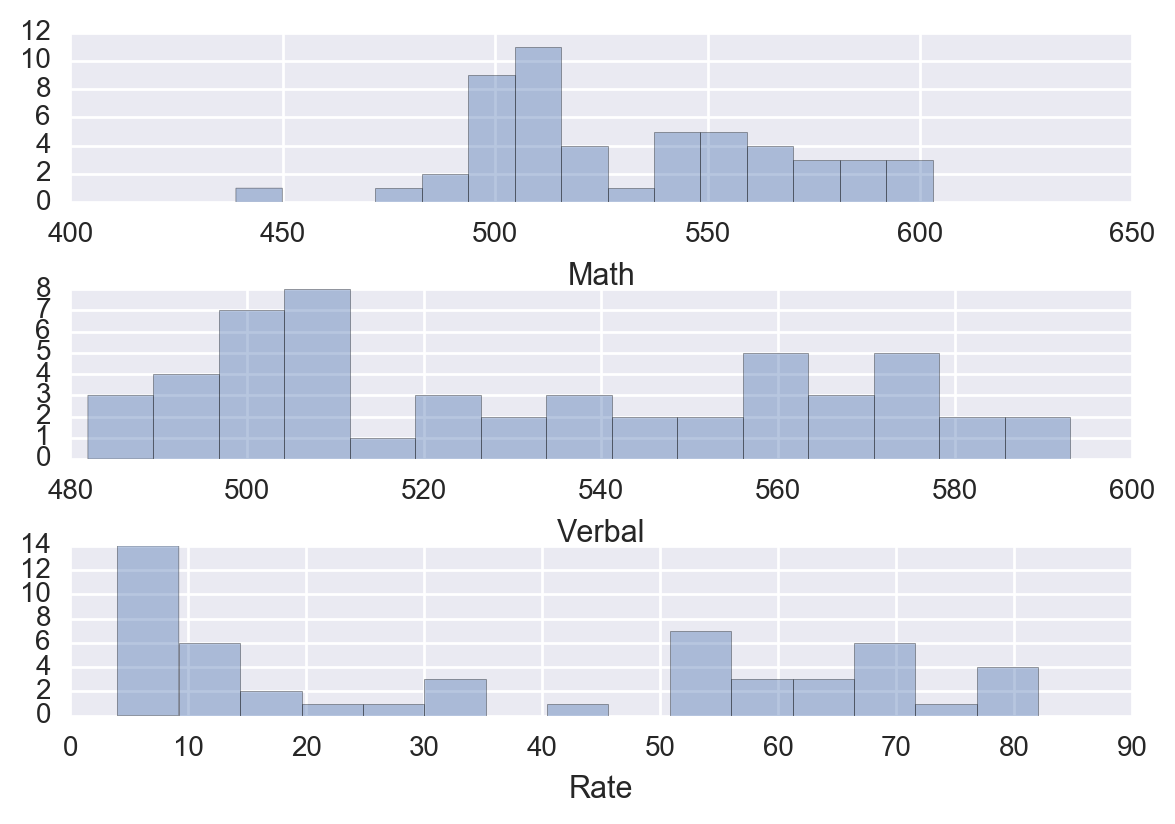

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

#plt.style=''
plt.tight_layout()

# Tell pointplot to plot on ax1 with the ax argument
#sns.pointplot(x="x", y="y", data=data, ax=ax1)

sns.distplot(sat_scores.Math, kde=False, bins=15, ax=ax1)
sns.distplot(sat_scores.Verbal, kde=False, bins=15, ax=ax2)
sns.distplot(sat_scores.Rate, kde=False, bins=15, ax=ax3)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

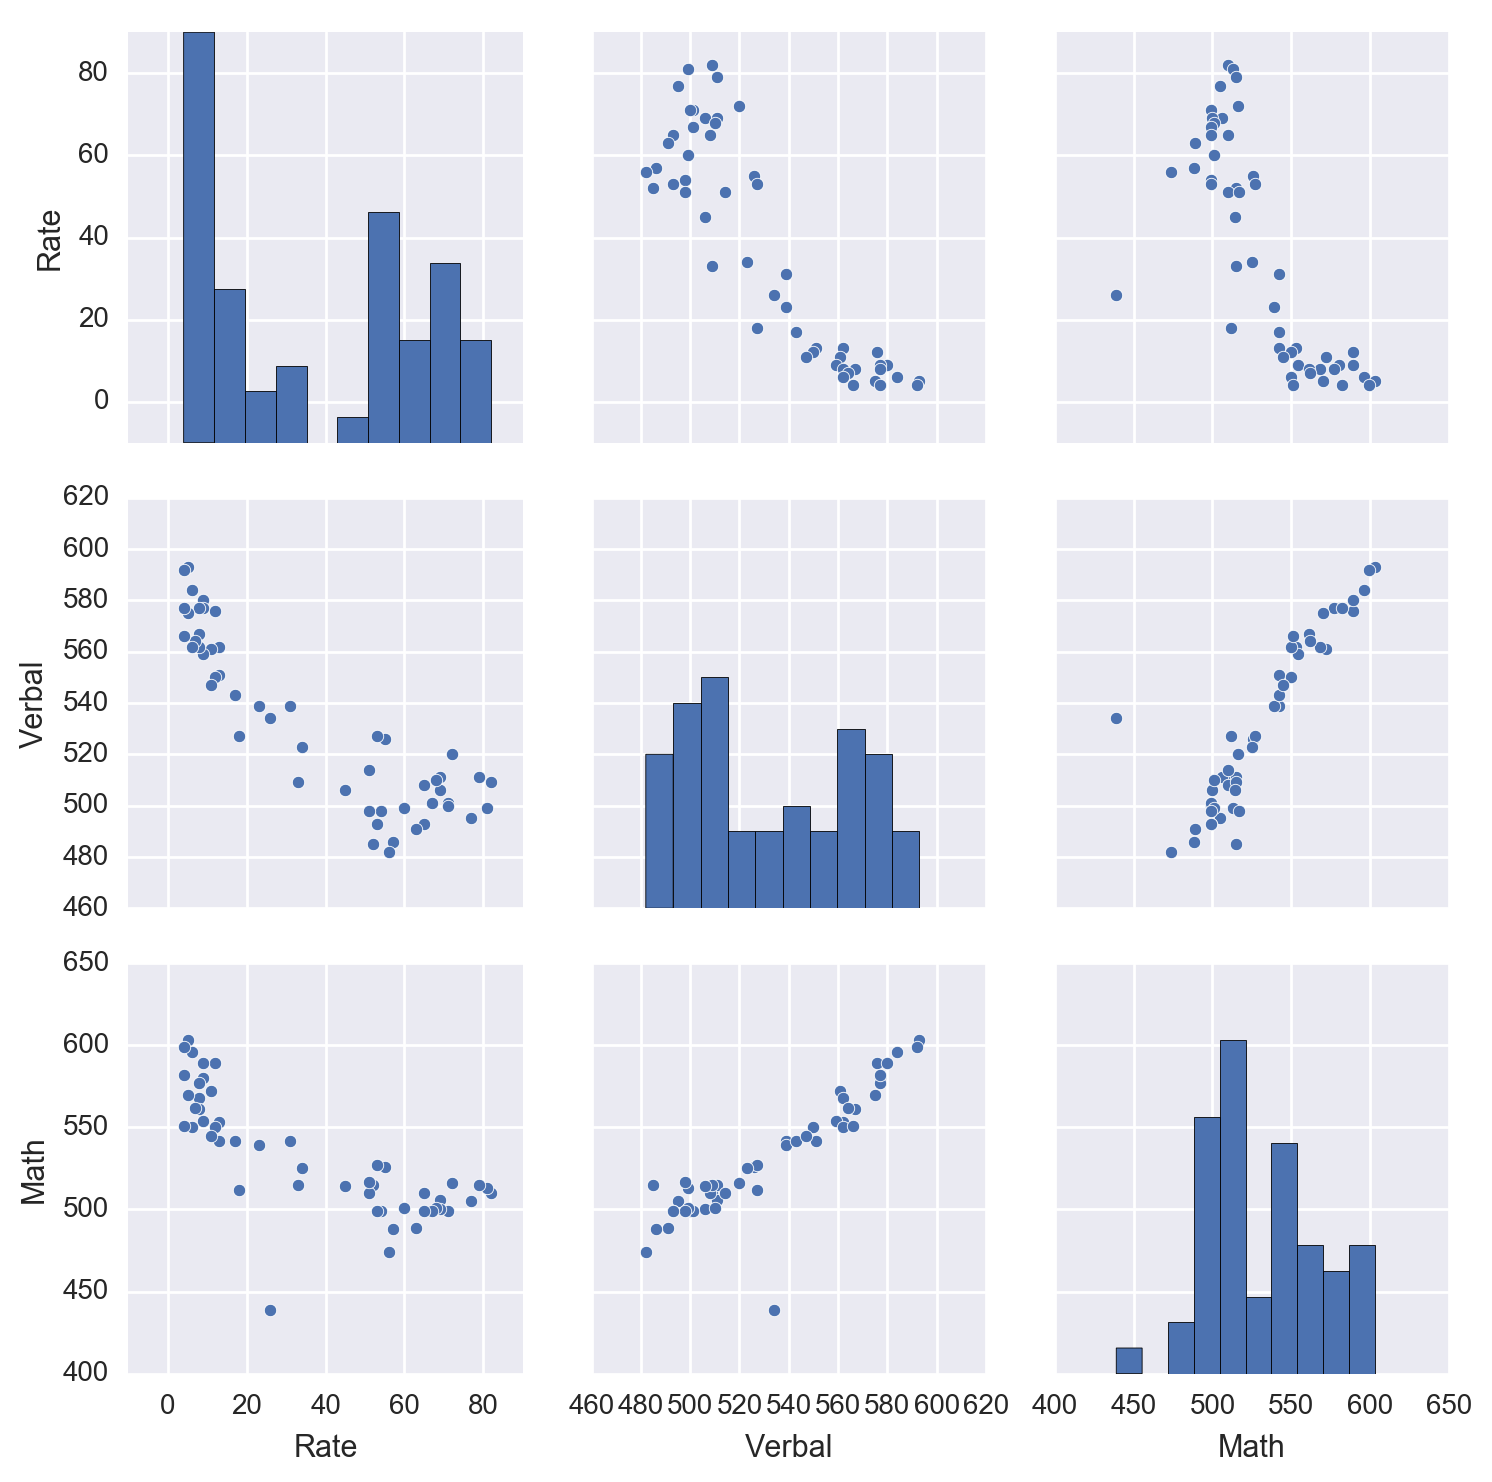

In [15]:
sns.pairplot(sat_scores)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

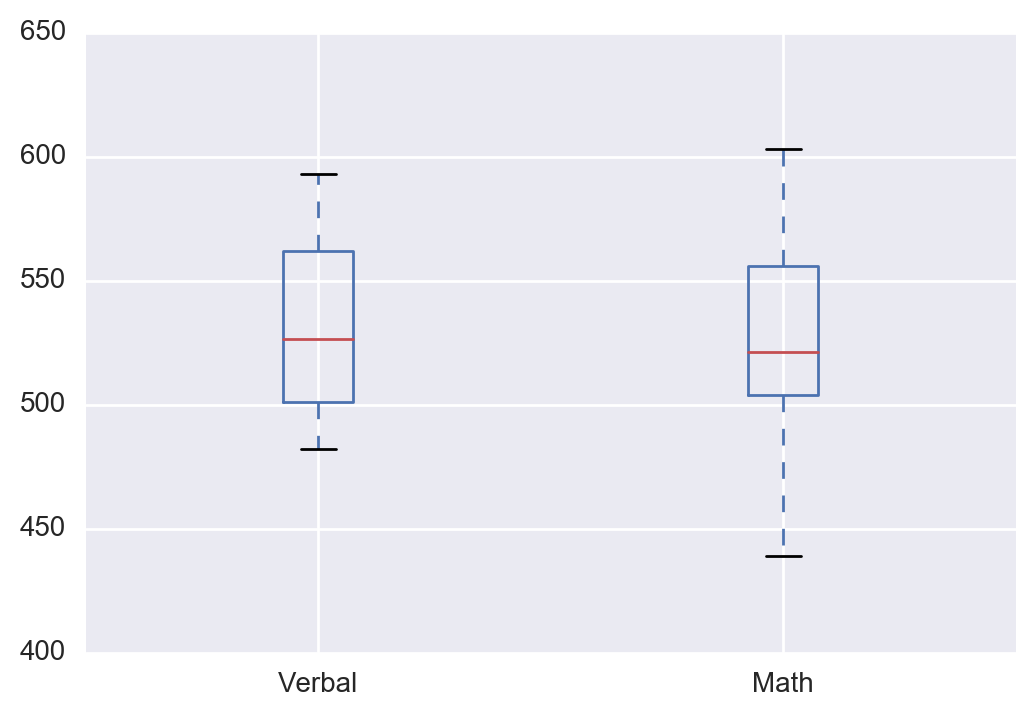

In [16]:
df = pd.DataFrame(sat_scores[['Verbal','Math']], columns=['Verbal', 'Math'])

df.plot.box()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

personaly i like boxplots becouse they show where the data is bunched.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


//anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/ops.py:995: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 52
  yrav = yrav[mask]


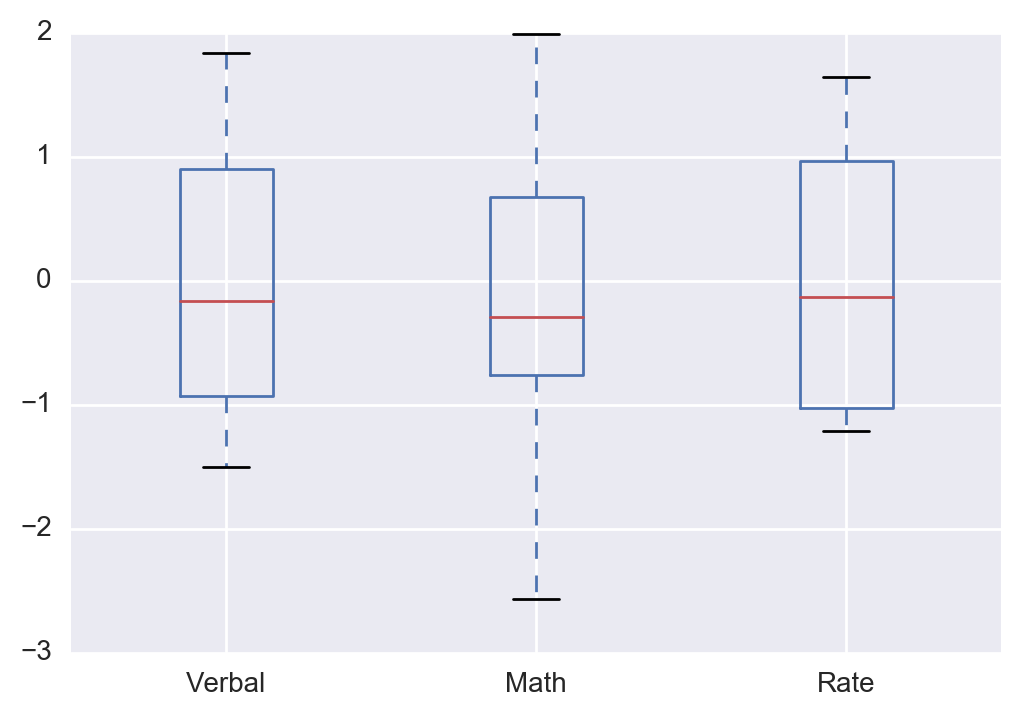

In [17]:
sat_scores_norm = (sat_scores - sat_scores.mean()) / sat_scores.std()
SATdf = pd.DataFrame(sat_scores_norm[['Verbal','Math', 'Rate']], columns=['Verbal', 'Math', 'Rate'])
SATdf.plot.box()


#the data is dopalyed has been noramlised now we can see the diffrance in dispershion clear
#between the two tests and rate.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [18]:
#v_dat = sat_scores[['Verbal'] > sat_scores['Verbal'].mean()]
vmean_data = sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].mean()]
print vmean_data['State']
#set(sat_scores[['Verbal'] > sat_scores['Verbal'].mean()])

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [19]:
vmed_dat = sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].median()]
print vmed_dat['State']
print "It is",len(vmed_dat)>len(vmean_data),"that the median is less than the mean.\nThe longer list is more inclusive."
print "This give us a sugestion of skewnes, but is not perice at all."

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
It is True that the median is less than the mean.
The longer list is more inclusive.
This give us a sugestion of skewnes, but is not perice at all.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [20]:
sat_scores['Difference'] = sat_scores['Verbal'] - sat_scores['Math']
#why not the absloute value of the difrence?

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [21]:
greatest_gap_V_higher = sat_scores[sat_scores['Verbal'] > sat_scores['Math']]
greatest_gap_M_higher = sat_scores[sat_scores['Math'] > sat_scores['Verbal']]
print greatest_gap_V_higher.shape, greatest_gap_M_higher.shape
greatest_gap_M_higher = greatest_gap_M_higher.sort('Difference', ascending=True)['State']
greatest_gap_V_higher = greatest_gap_V_higher.sort('Difference', ascending=True)['State']

print greatest_gap_M_higher.head(3)
print greatest_gap_V_higher.head(3)

#sort_values

(22, 5) (25, 5)
21    HI
23    CA
1     NJ
Name: State, dtype: object
6     PA
30    ID
43    LA
Name: State, dtype: object


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [22]:
sat_scores.corr()

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Difference,-0.101412,0.052600,-0.388219,1.000000


In [23]:
#the math and verbal scores are strongly correlated

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [24]:
sat_scores.describe()
"""
there are 52 row
the mean tells us the avrages...
we can see that the std in math is slightly higher than verbal, hard to comaprir with rate becouse not normalized
math has a lower min then verbal
bottom 25% is slghtly better at math
bottom 50% is better at verbal - this inclueds the bottom 25%,
bottom 75% has a higher verbal - this includes the bottom 50%, 
when we consider this is sugests a tread that scores is incresing 'faster/more' for verbal than math
max for math is higher. note: the max for diff is way higher than its mean, the max data point is an extream outlier.


"""

"\nthere are 52 row\nthe mean tells us the avrages...\nwe can see that the std in math is slightly higher than verbal, hard to comaprir with rate becouse not normalized\nmath has a lower min then verbal\nbottom 25% is slghtly better at math\nbottom 50% is better at verbal - this inclueds the bottom 25%,\nbottom 75% has a higher verbal - this includes the bottom 50%, \nwhen we consider this is sugests a tread that scores is incresing 'faster/more' for verbal than math\nmax for math is higher. note: the max for diff is way higher than its mean, the max data point is an extream outlier.\n\n\n"

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [25]:
print sat_scores.cov()

"""
1) The covariance matrix shows the covariances. The correlation matrix shows the correlations.... 
2)To convert the covariance into the correlation 
divide the covariance by the product of the stander devations for each varable
3)The correlation matrix is much easyer to intruprate; it is in the range -1 to 1.
"""

                  Rate       Verbal         Math  Difference
Rate        745.387632  -804.355958  -760.803922  -43.552036
Verbal     -804.355958  1104.646682  1077.147059   27.499623
Math       -760.803922  1077.147059  1297.078431 -219.931373
Difference  -43.552036    27.499623  -219.931373  247.430995


'\n1) The covariance matrix shows the covariances. The correlation matrix shows the correlations.... \n2)To convert the covariance into the correlation \ndivide the covariance by the product of the stander devations for each varable\n3)The correlation matrix is much easyer to intruprate; it is in the range -1 to 1.\n'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [6]:
iowa_file = '/Users/Harrison/Desktop/DSI-SF-4-HSRugg/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa_sales = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [27]:
print iowa_sales.describe()
print iowa_sales.info()


//anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


        Store Number  County Number      Category  Vendor Number  \
count  270955.000000  269878.000000  2.708870e+05   270955.00000   
mean     3590.263701      57.231642  1.043888e+06      256.43443   
std       947.662050      27.341205  5.018211e+04      141.01489   
min      2106.000000       1.000000  1.011100e+06       10.00000   
25%      2604.000000            NaN           NaN      115.00000   
50%      3722.000000            NaN           NaN      260.00000   
75%      4378.000000            NaN           NaN      380.00000   
max      9023.000000      99.000000  1.701100e+06      978.00000   

         Item Number  Bottle Volume (ml)   Bottles Sold  Volume Sold (Liters)  \
count  270955.000000       270955.000000  270955.000000         270955.000000   
mean    45974.963300          924.830341       9.871285              8.981351   
std     52757.043086          493.088489      24.040912             28.913690   
min       168.000000           50.000000       1.000000        

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [7]:
iowa_file = '/Users/Harrison/Desktop/DSI-SF-4-HSRugg/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa_sales = pd.read_csv(iowa_file)

print "Before:\n",iowa_sales.info()

print iowa_sales['Item Description'].get_dtype_counts().astype(list)

iowa_sales.head(3)

#Date should be converted to data time
#City should be converted to string
#Zip Code be converted to string or int
#County should be converted to string
#Category should msybr be converted to string
#Category Name  should be converted to string
#Item Description should be converted to string
# State Bottle Cost be converted to float
# State Bottle Retail be converted to float

def con_to_datetime(val):
    if type(val)==str:
        try:
            val = str(val)
            month, day, year, = val.split("/")    
            return pd.datetime(int(year),int(month),int(day))
        except:
            pass
        
iowa_sales['Date'] = iowa_sales['Date'].apply(con_to_datetime)


def clean_cash_valuse(val):
    try:
        #print type(val.replace("$", "").replace(",", ""))
        return float(val.replace("$", ""))
    except:
            pass

has_doller_sign = ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']
for col in has_doller_sign:
    iowa_sales[col] = iowa_sales[col].apply(clean_cash_valuse)


print "\n\nAfter:\n",iowa_sales.info()
print "Done"

Before:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4)

In [33]:
mask = [type(data)==float for data in iowa_sales['County']]
#print len(mask)
citys_with_missing = set(iowa_sales[mask]['City'])
print iowa_sales[iowa_sales['Store Number']==5216].head(10)
iowa_sales.head()

def find_county_by_city(city):
    c_and_cn = iowa_sales[iowa_sales['City']==city]
    for row in c_and_cn['County']:
        if type(row)!=float:
            return {city : row}
        else: return {city : np.NaN}
            
# TABOR : Fremont
# RUNNELLS : Polk County
# SEYMOUR : Wayne County
print type(citys_with_missing), len(citys_with_missing)
city_county_dict = {}
for city in list(citys_with_missing):
    print city
    city_county_dict.update(find_county_by_city(str(city)))
    
print city_county_dict

             Date  Store Number      City Zip Code  County Number County  \
156543 2016-03-09          5216  RUNNELLS    50237            NaN    NaN   
213206 2016-03-09          5216  RUNNELLS    50237            NaN    NaN   
234840 2016-03-09          5216  RUNNELLS    50237            NaN    NaN   

         Category        Category Name  Vendor Number  Item Number  \
156543  1081300.0  PEPPERMINT SCHNAPPS            434        81206   
213206  1011100.0     BLENDED WHISKIES            260        25604   
234840  1012100.0    CANADIAN WHISKIES            115        11776   

                     Item Description  Bottle Volume (ml)  State Bottle Cost  \
156543  Paramount Peppermint Schnapps                 750               3.75   
213206    Seagrams 7 Crown Bl Whiskey                 375               3.50   
234840                   Black Velvet                 750               5.23   

        State Bottle Retail  Bottles Sold  Sale (Dollars)  \
156543                 5.63     

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [34]:
not_null = [row for row in iowa_sales if len(iowa_sales['Category'])!=0]
iowa_sales[not_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetim

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [35]:
print iowa_sales.head()
print len(iowa_sales['Store Number']), len(set(iowa_sales['Store Number']))
grouped_by_store_num = iowa_sales.groupby('Store Number')
range_by_store_num = grouped_by_store_num['Date'].max() -  grouped_by_store_num['Date'].min()

print range_by_store_num.head()



        Date  Store Number         City Zip Code  County Number      County  \
0 2015-11-04          3717       SUMNER    50674            9.0      Bremer   
1 2016-03-02          2614    DAVENPORT    52807           82.0       Scott   
2 2016-02-11          2106  CEDAR FALLS    50613            7.0  Black Hawk   
3 2016-02-03          2501         AMES    50010           85.0       Story   
4 2015-08-18          3654      BELMOND    50421           99.0      Wright   

    Category              Category Name  Vendor Number  Item Number  \
0  1051100.0           APRICOT BRANDIES             55        54436   
1  1011100.0           BLENDED WHISKIES            395        27605   
2  1011200.0  STRAIGHT BOURBON WHISKIES             65        19067   
3  1071100.0         AMERICAN COCKTAILS            395        59154   
4  1031080.0             VODKA 80 PROOF            297        35918   

            Item Description  Bottle Volume (ml)  State Bottle Cost  \
0  Mr. Boston Apricot Brand

'<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [36]:

year_2016_mask = [date.year==2016 for date in iowa_sales['Date']]

print iowa_sales[year_2016_mask].groupby('Store Number')['Sale (Dollars)'].sum().head()


Store Number
2106    30523.75
2113     2065.90
2130    27856.11
2152     1376.43
2178     5588.50
Name: Sale (Dollars), dtype: float64


### 10.2 Calculate the profit each store is making in 2015.


In [14]:
year_2015_mask = [date.year==2015 for date in iowa_sales['Date']]

profit_data_2015 = iowa_sales[year_2015_mask][['Store Number','State Bottle Cost', 'State Bottle Retail', 'Bottles Sold']]
profit_data_2015['Profit'] = (profit_data_2015['State Bottle Retail'] - profit_data_2015['State Bottle Cost']) * profit_data_2015['Bottles Sold']
profit_data_2015.groupby('Store Number')['Profit'].sum().head()

Store Number
2106    48838.08
2113     3109.04
2130    37325.20
2152     2587.53
2178     8165.70
Name: Profit, dtype: float64

### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [38]:
year_2015_mask = [date.year==2015 for date in iowa_sales['Date']]

profit_data_2015 = iowa_sales[year_2015_mask][['County','State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Volume Sold (Gallons)']]
profit_data_2015['Profit'] = (profit_data_2015['State Bottle Retail'] - profit_data_2015['State Bottle Cost']) * profit_data_2015['Bottles Sold']
#profit_data_2015["County"].head()
profit_data_2015_sumed = profit_data_2015.groupby('County').sum()
profit_data_2015_sumed['Profit_per_Gal'] = profit_data_2015_sumed['Profit']/profit_data_2015_sumed['Volume Sold (Gallons)']
#profit_data_2015['Profit_per_Gal'] = profit_data_2015['Profit']/profit_data_2015['Volume Sold (Gallons)']
print profit_data_2015_sumed.sort_values('Profit_per_Gal', ascending=False).head(200)

               State Bottle Cost  State Bottle Retail  Bottles Sold  \
County                                                                
Dallas                  21363.96             32098.32         29260   
Johnson                109616.75            164610.65        120606   
Polk                   402422.50            604309.28        474031   
Scott                  129524.00            194504.44        167733   
Jefferson                7124.62             10694.82          6097   
Des Moines              32225.08             48382.13         31125   
Woodbury                68525.76            102884.13         76745   
Washington              12965.12             19468.32         10566   
Buena Vista             22826.08             34281.72         12559   
Marshall                23495.21             35289.14         20776   
Pottawattamie           68697.54            103151.26         76453   
Black Hawk             112759.05            169344.28        142934   
Lee   

### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [40]:
cat_names = set(iowa_sales['Category Name'])
words_in_cat_names = [str(name).split(' ') for name in cat_names]
#split to small medium big very big
#flatten list
words_in_cat_names = [item for sublist in words_in_cat_names for item in sublist]

cat_words_with_count = [[words_in_cat_names.count(word), word] for word in set(words_in_cat_names)]
word_ary =  np.array(cat_words_with_count)
print "lenths of cat names:", len(cat_names)
#print sorted(word_ary, key=lambda student: int(student[0]), reverse=1) 

def new_cats(title):
    try:
        if 'WHISKIES' in title.upper():
            return 'WHISKIES'
        if 'SCHNAPPS' in title.upper():
            return 'SCHNAPPS'
        if 'VODKA' in title.upper():
            return'VODKA'
        if 'GIN' in title.upper():
            return 'GIN'
        if 'RUM' in title.upper():
            return 'RUM'
        else: return 'OTHER'
    except:
        return 'Unknown'

    
iowa_sales['Gen_Category'] = iowa_sales['Category Name'].apply(new_cats)
iowa_sales.head()

lenths of cat names: 72


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Gen_Category
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,OTHER
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,WHISKIES
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,WHISKIES
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,OTHER
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,VODKA


### 10.5 Do relationships exist between the broader liquor type and profit?

In [57]:
import scipy.stats as stats

iowa_sales['Profit'] = (iowa_sales['State Bottle Retail'] - iowa_sales['State Bottle Cost']) * iowa_sales['Bottles Sold']




WHISKIES = iowa_sales.groupby('Gen_Category').get_group('WHISKIES')['Profit']
SCHNAPPS = iowa_sales.groupby('Gen_Category').get_group('SCHNAPPS')['Profit']
VODKA = iowa_sales.groupby('Gen_Category').get_group('VODKA')['Profit']
RUM = iowa_sales.groupby('Gen_Category').get_group('RUM')['Profit']
GIN = iowa_sales.groupby('Gen_Category').get_group('GIN')['Profit']
OTHER = iowa_sales.groupby('Gen_Category').get_group('OTHER')['Profit']
x = WHISKIES, VODKA, SCHNAPPS, RUM, GIN, OTHER
print stats.f_oneway(*x)
#print stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)



F_onewayResult(statistic=61.349889685025033, pvalue=4.8300542399853103e-15)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [517]:
mean_Mean=iowa_sales.groupby('Store Number')["Sale (Dollars)"].mean().mean()
mean_max=iowa_sales.groupby('Store Number')["Sale (Dollars)"].mean().max()
max_max=iowa_sales.groupby('Store Number')["Sale (Dollars)"].max().max()
print "The avrage sale per store was", mean_Mean
print "The max avrage sale per store was", mean_max
print "The max sale of any store was", max_max

The avrage sale per store was 124.715502763
The max avrage sale per store was 6435.0
The max sale of any store was 36392.4


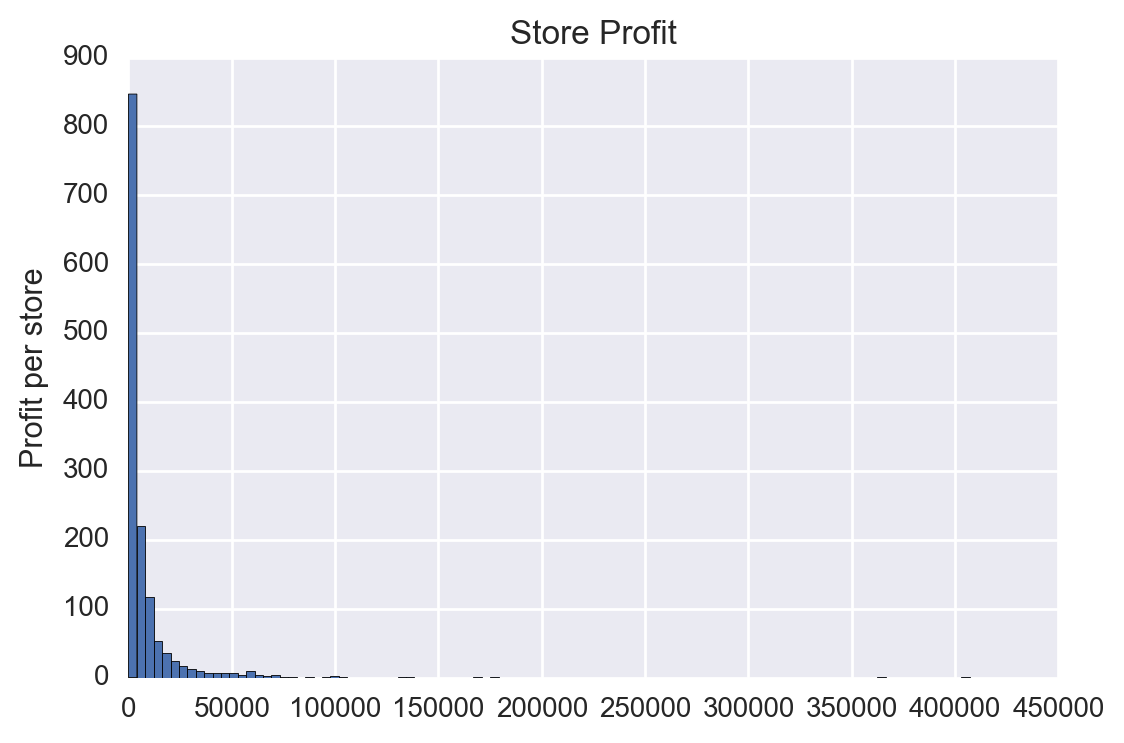

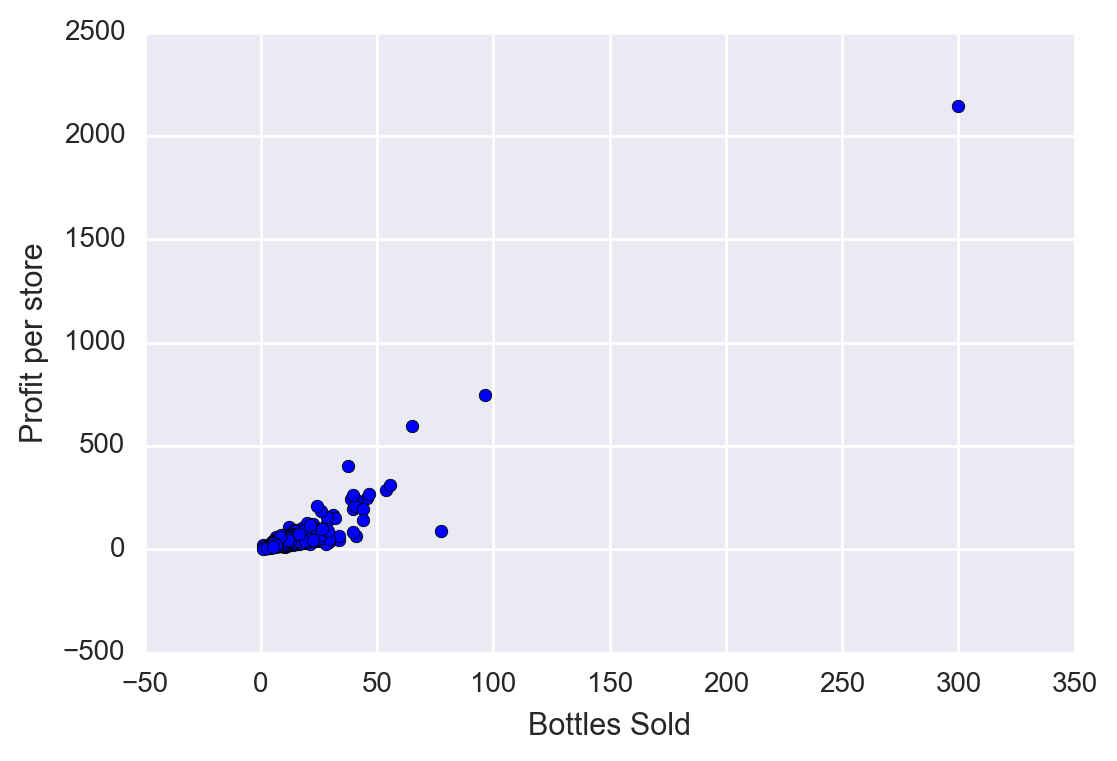

Store Number  Date      
2106          2015-01-08    1696.92
              2015-01-15     923.64
              2015-01-22     845.85
              2015-01-29    1057.68
              2015-02-05     669.82
Name: Profit, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 20 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail     

In [121]:
iowa_sales['Profit'] = (iowa_sales['State Bottle Retail'] - iowa_sales['State Bottle Cost']) * iowa_sales['Bottles Sold']



sore_means = iowa_sales.groupby('Store Number')["Sale (Dollars)"].mean()
sore_means = sore_means.reset_index()
sore_means = sore_means.sort_values('Sale (Dollars)')
#sns.boxplot(data=sore_means, y='Sale (Dollars)')
#iowa_sales.groupby('Store Number')['Profit'].describe()
pro_by_store = iowa_sales.groupby('Store Number')['Profit'].sum()
pro_by_store = pro_by_store.reset_index()

bottles_prof_by_store = iowa_sales.groupby('Store Number')[['Profit', 'Bottles Sold']].mean()
bottles_prof_by_store = bottles_prof_by_store.reset_index()

plt.pyplot.hist(pro_by_store['Profit'], bins=100)
#plt.pyplot.boxplot(plot_data['Profit'])
plt.pyplot.title('Store Profit')
plt.pyplot.ylabel('Number of stores')
plt.pyplot.ylabel('Profit per store')
plt.pyplot.show()


plt.pyplot.scatter(bottles_prof_by_store['Bottles Sold'], bottles_prof_by_store['Profit'])
#plt.pyplot.boxplot(plot_data['Profit'])
plt.pyplot.xlabel('Bottles Sold')
plt.pyplot.ylabel('Profit per store')
plt.pyplot.show()
#iowa_sales['Dayly_Prof'] = 
print iowa_sales.groupby(['Store Number','Date'])['Profit'].sum().head()
#df = iowa_sales.groupby(['Store Number','Date'])
#iowa_sales.groupby('Store Number').get_group(int(2016))
iowa_sales.info()
#iowa_sales.groupby('')



In [141]:
store_groups = iowa_sales.groupby(['Store Number','Date'])['Profit'].sum()

# for store in set(iowa_sales['Store Number']):
#     single_store = store_groups.get_group(store)
#     single_store_day_grps = single_store.groupby('Date')
#     days = []
#     for day in set(single_store['Date']):
#         single_store_single_day = single_store_day_grps.get_group(day)
#         days.append(single_store_single_day['Profit'].sum())
        
store_groups.tail(50)

KeyError: 'Store Number'

In [132]:
sum(days)

92.71000000000002

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


done [ 1  2  3  4  5  6  7  8  9 10 11 12]


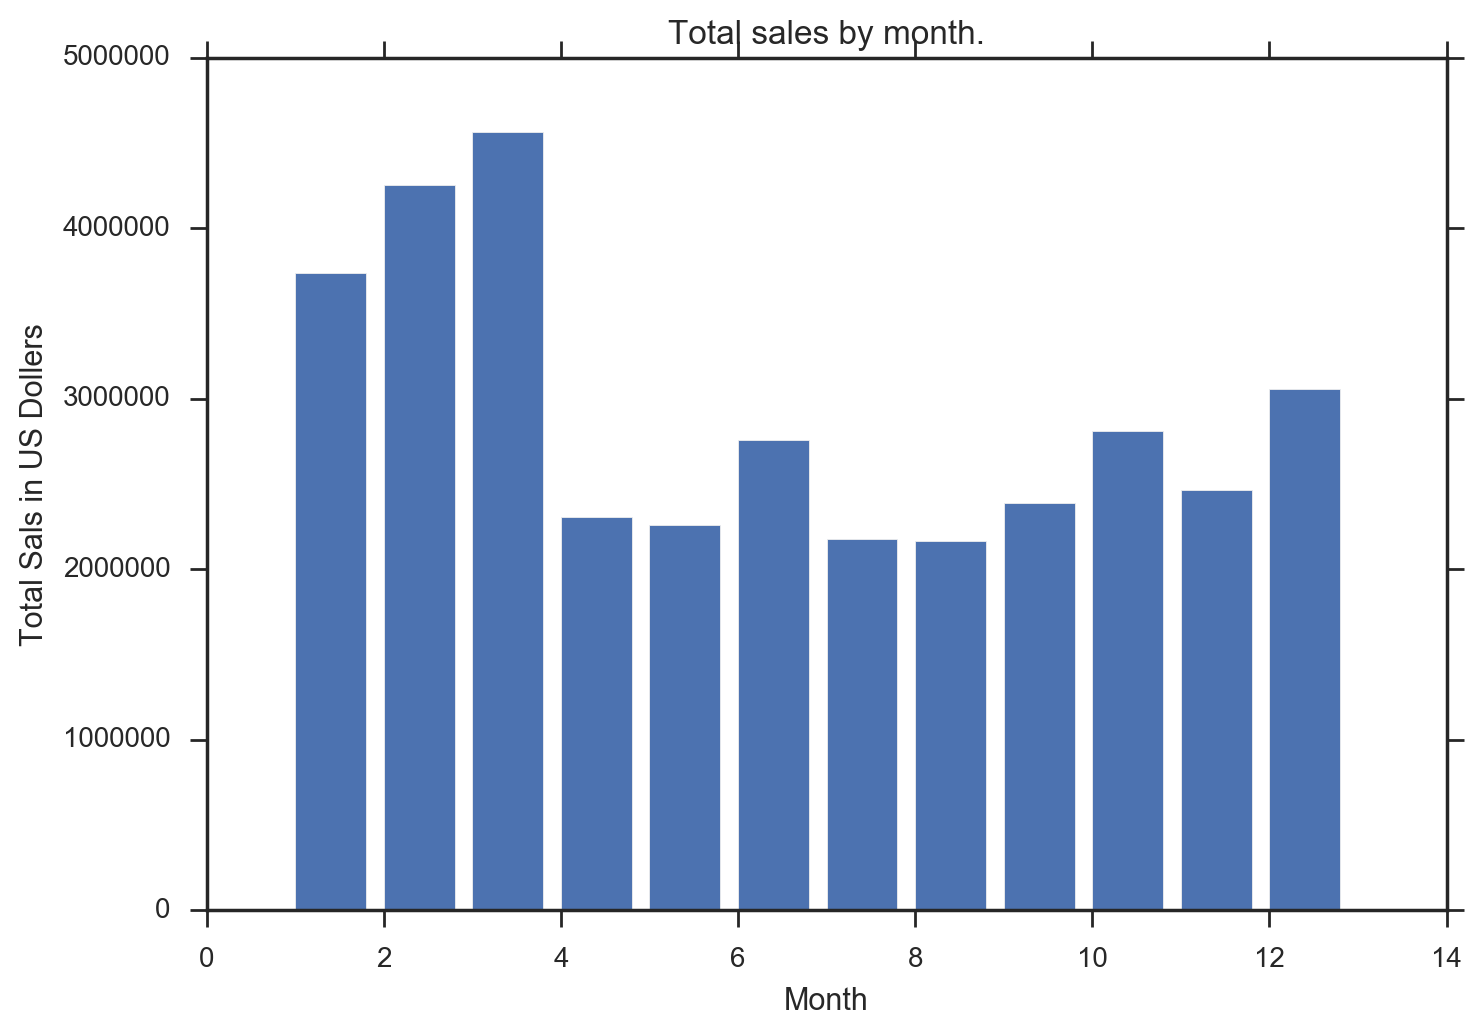

In [480]:
#[date.month for date in iowa_sales['Date']]
from datetime import date
import calendar
import matplotlib.pyplot as plt

iowa_sales['Day'] = [calendar.day_name[date.weekday()] for date in iowa_sales['Date']]
#iowa_sales['Month'] = [date.strftime("%B") for date in iowa_sales['Date']]
iowa_sales['Month'] = [date.month for date in iowa_sales['Date']]
iowa_sales['Year'] = [date.year for date in iowa_sales['Date']]
iowa_sales['Day_count'] = [date.strftime("%j") for date in iowa_sales['Date']]



sums = iowa_sales.groupby('Month')['Sale (Dollars)'].sum()
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], sums)
plt.ylabel('Total Sals in US Dollers')
plt.xlabel('Month')
plt.title('Total sales by month.')

#sums = sums.reindex()
print "done", sums.index.values



done Month
April        2302566.62
August       2164753.72
December     3056656.60
February     4252368.49
January      3738584.16
July         2175922.14
June         2754960.95
March        4562340.80
May          2259716.10
November     2460865.60
October      2810088.85
September    2387918.92
Name: Sale (Dollars), dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

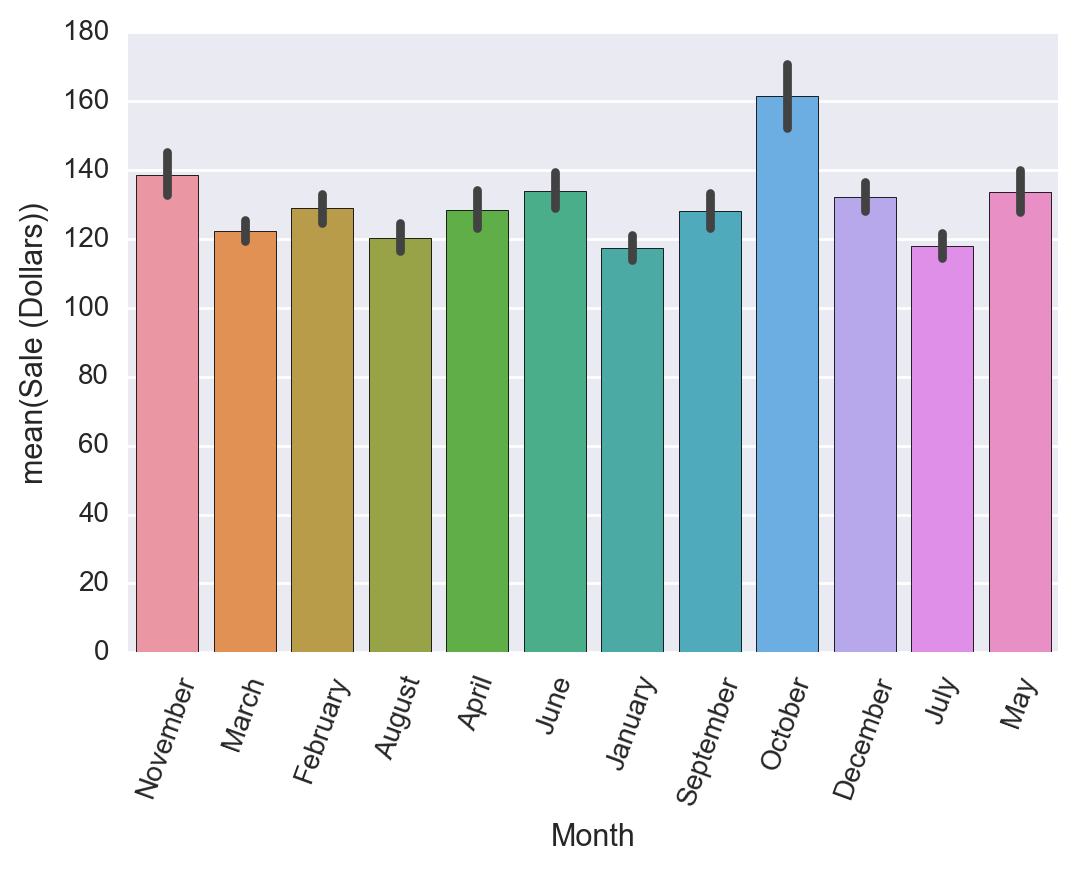

In [89]:
iowa_sales['Month'] = [date.strftime("%B") for date in iowa_sales['Date']]


sums = iowa_sales.groupby('Month')['Sale (Dollars)'].sum()
# plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], sums)
# plt.ylabel('Total Sals in US Dollers')
# plt.xlabel('Month')


#sums = sums.reindex()
print "done", sums

bar_by_month = sns.barplot(x="Month", y="Sale (Dollars)", data=iowa_sales);
plt.xticks(rotation=70)





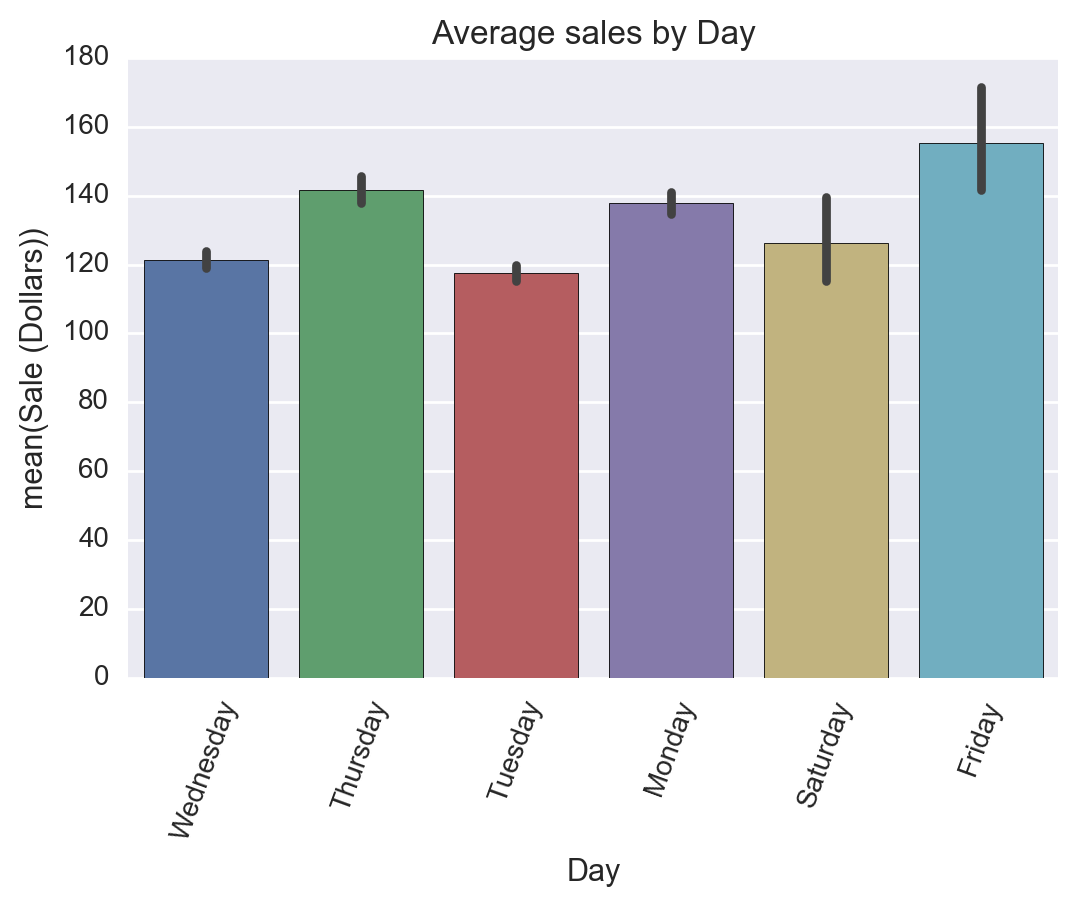

In [105]:
bar_by_day = sns.barplot(x="Day", y="Sale (Dollars)", data=iowa_sales);
plt.xticks(rotation=70)
plt.title('Average sales by Day')

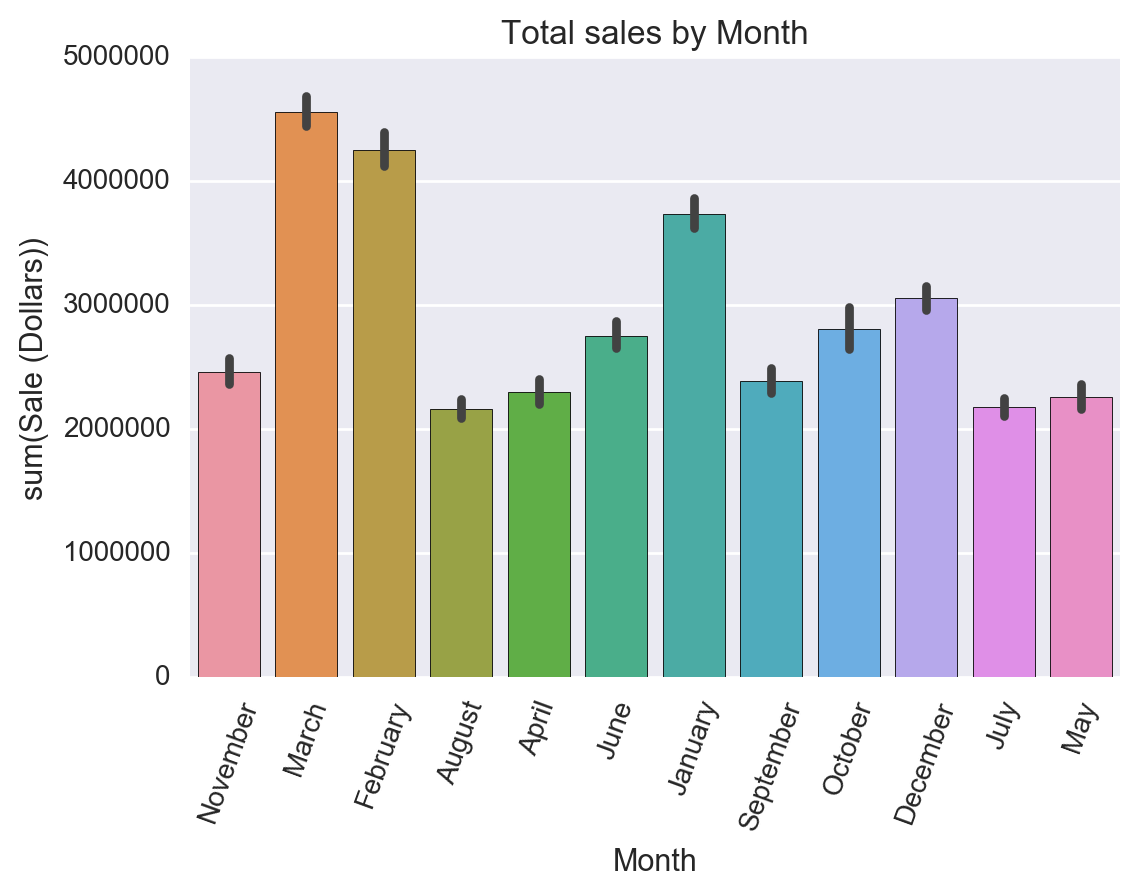

In [103]:
bar_by_month = sns.barplot(x="Month", y="Sale (Dollars)", data=iowa_sales, estimator=sum)
plt.xticks(rotation=70)
plt.title('Total sales by Month')

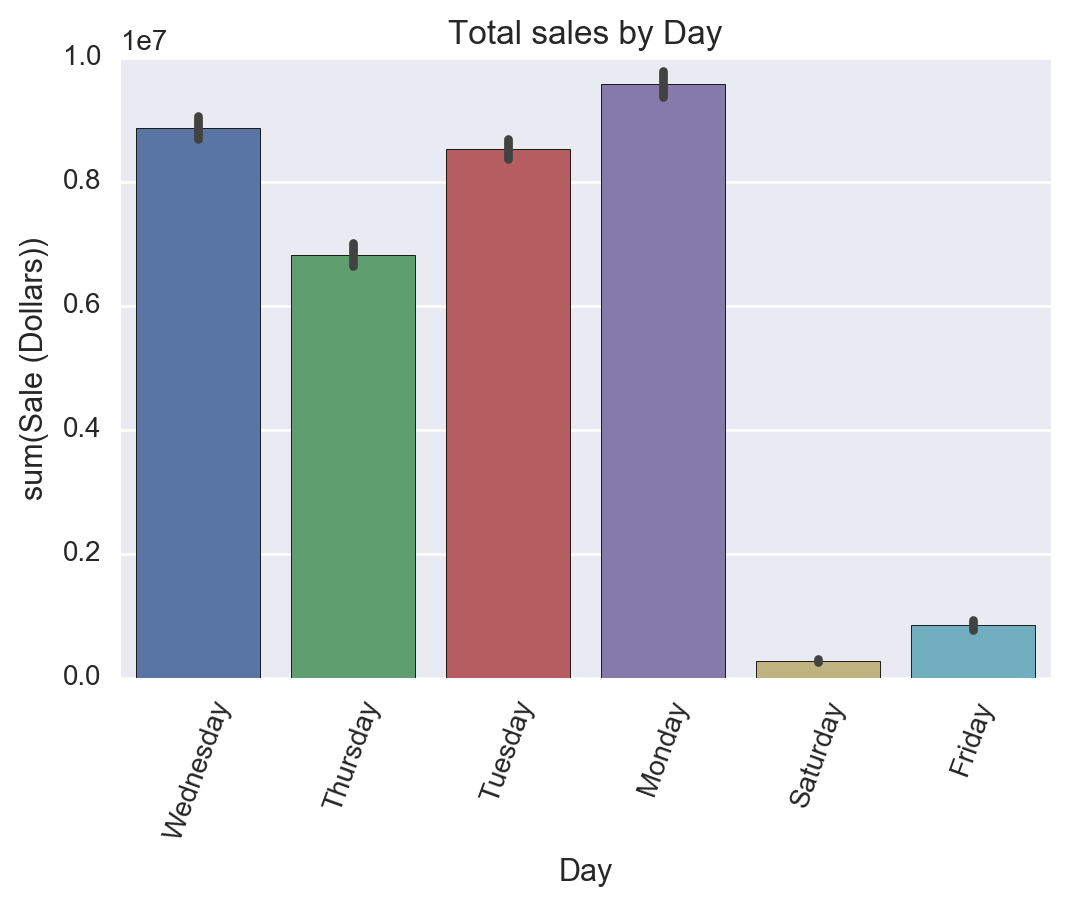

In [119]:
#Volume Sold (Gallons)

bar_by_day = sns.barplot(x="Day", y="Sale (Dollars)", data=iowa_sales, estimator=sum)
plt.xticks(rotation=70)
plt.title('Total sales by Day')


In [125]:
print iowa_sales.groupby('Day')['Sale (Dollars)'].sum().apply(lambda x: x/1000).round(2)
print iowa_sales.groupby('Month')['Sale (Dollars)'].sum().apply(lambda x: x/1000).round(2)



Day
Friday        846.95
Monday       9576.44
Saturday      277.27
Thursday     6822.46
Tuesday      8527.83
Wednesday    8875.79
Name: Sale (Dollars), dtype: float64
Month
April        2302.57
August       2164.75
December     3056.66
February     4252.37
January      3738.58
July         2175.92
June         2754.96
March        4562.34
May          2259.72
November     2460.87
October      2810.09
September    2387.92
Name: Sale (Dollars), dtype: float64


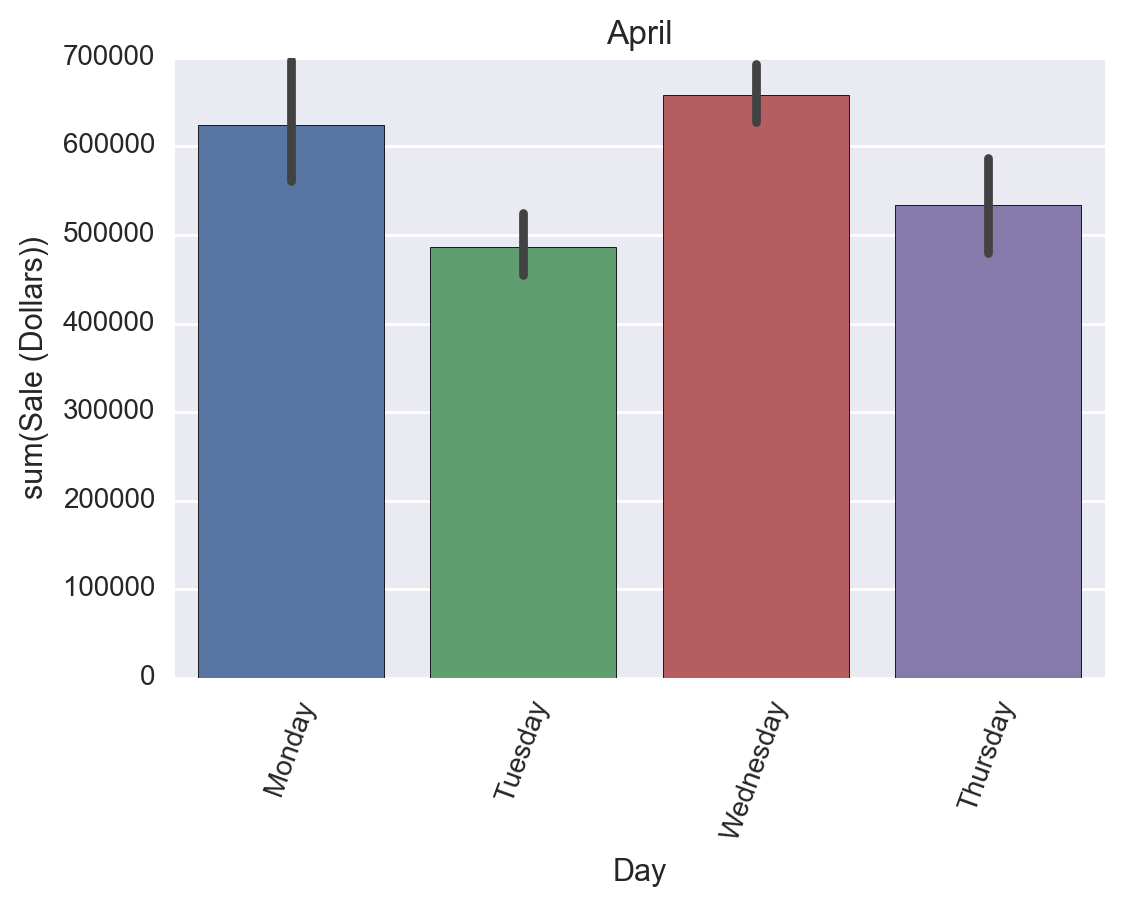

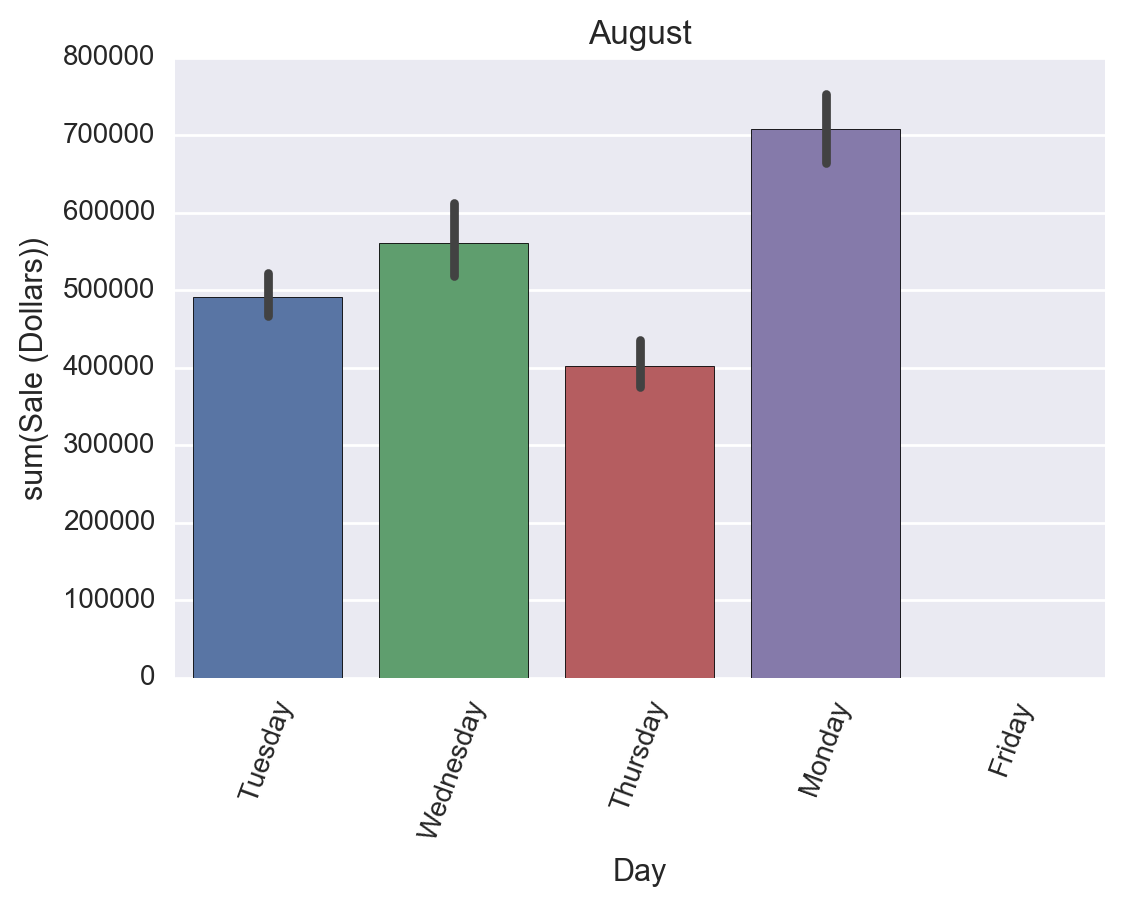

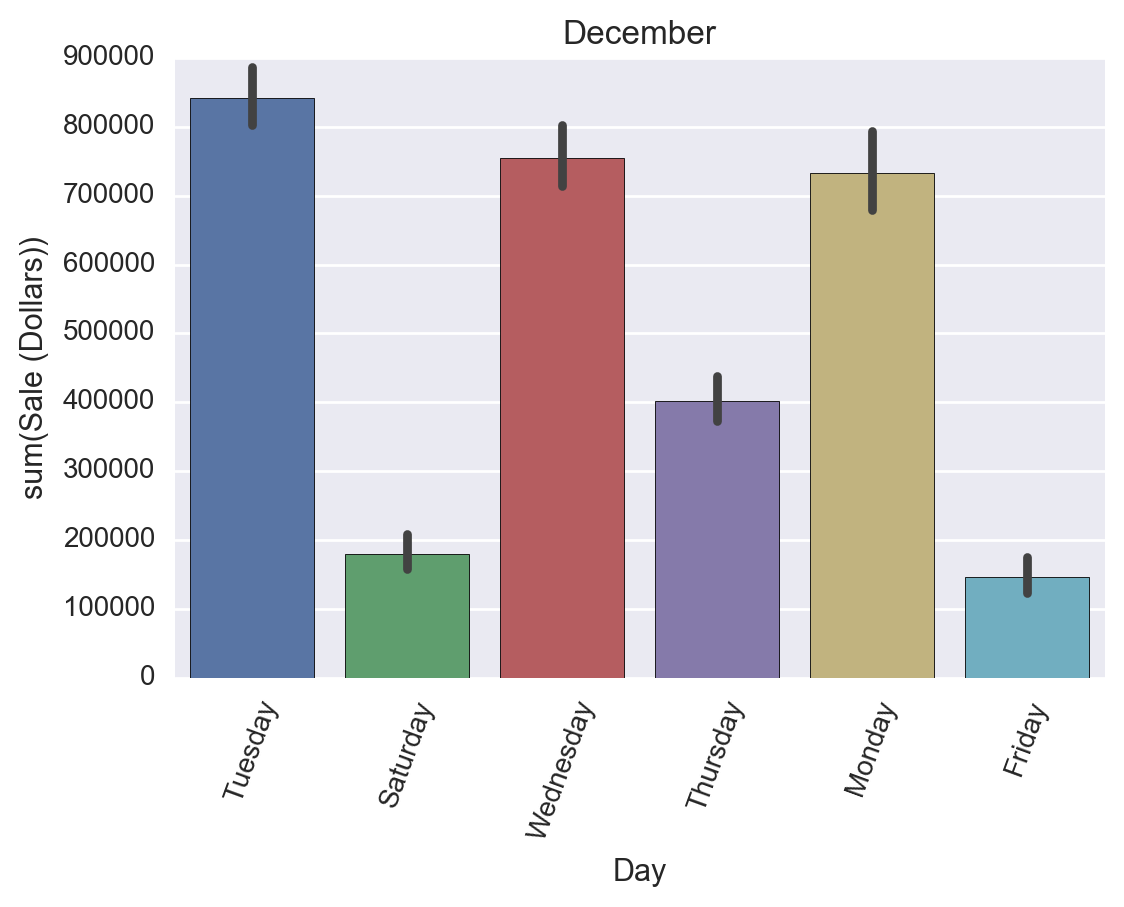

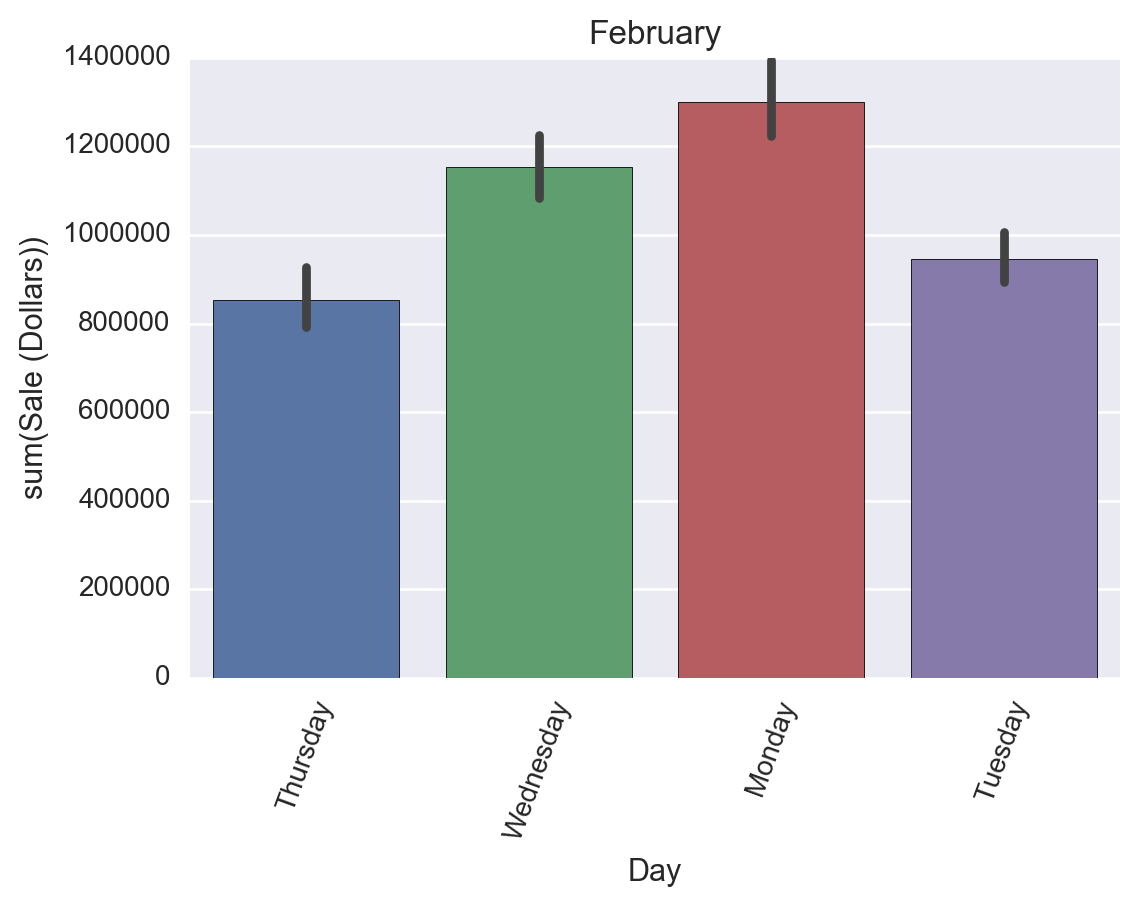

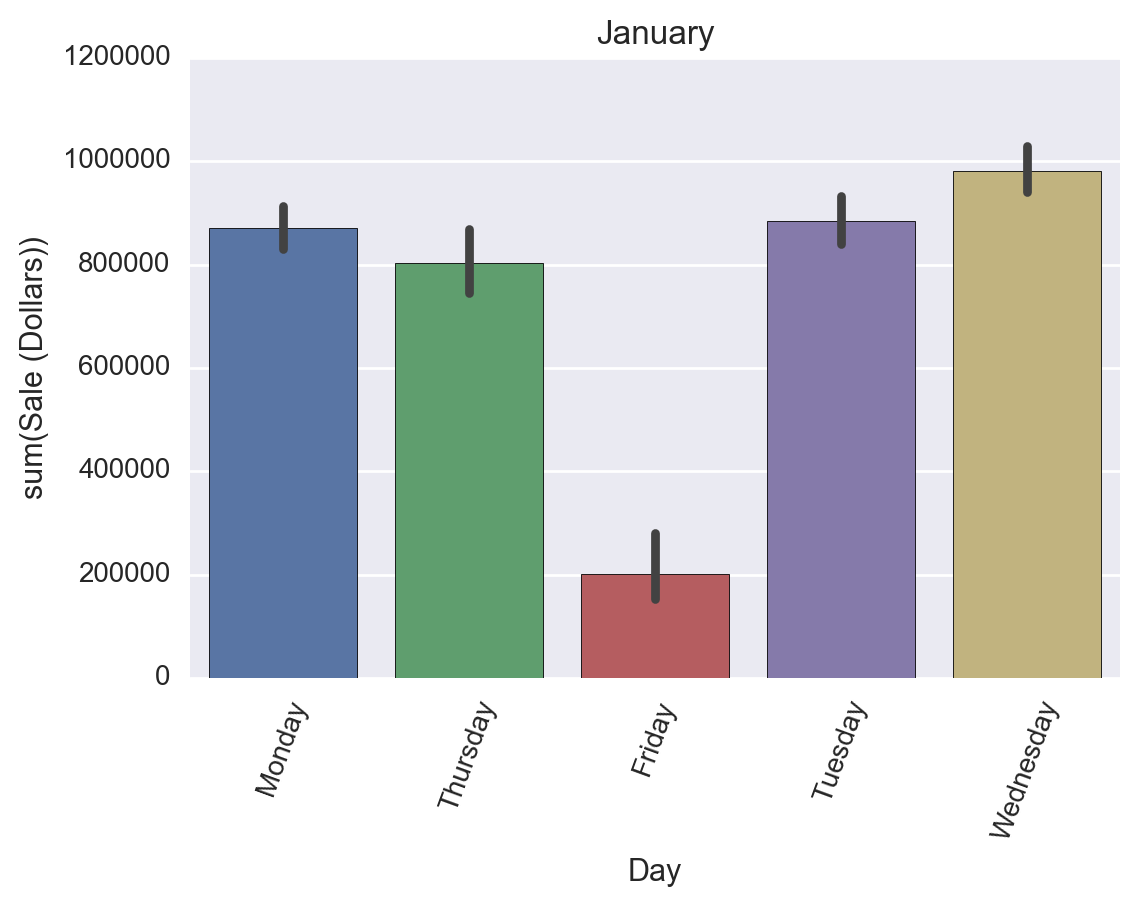

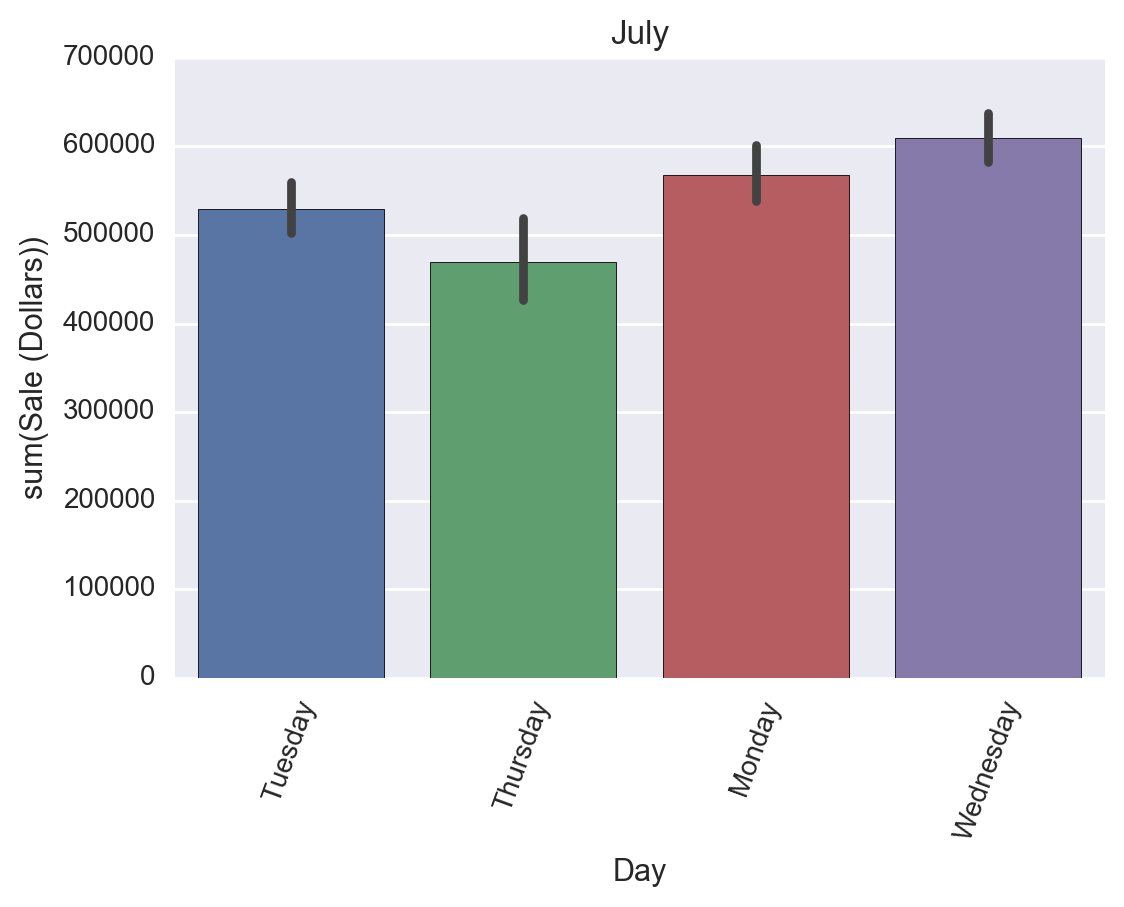

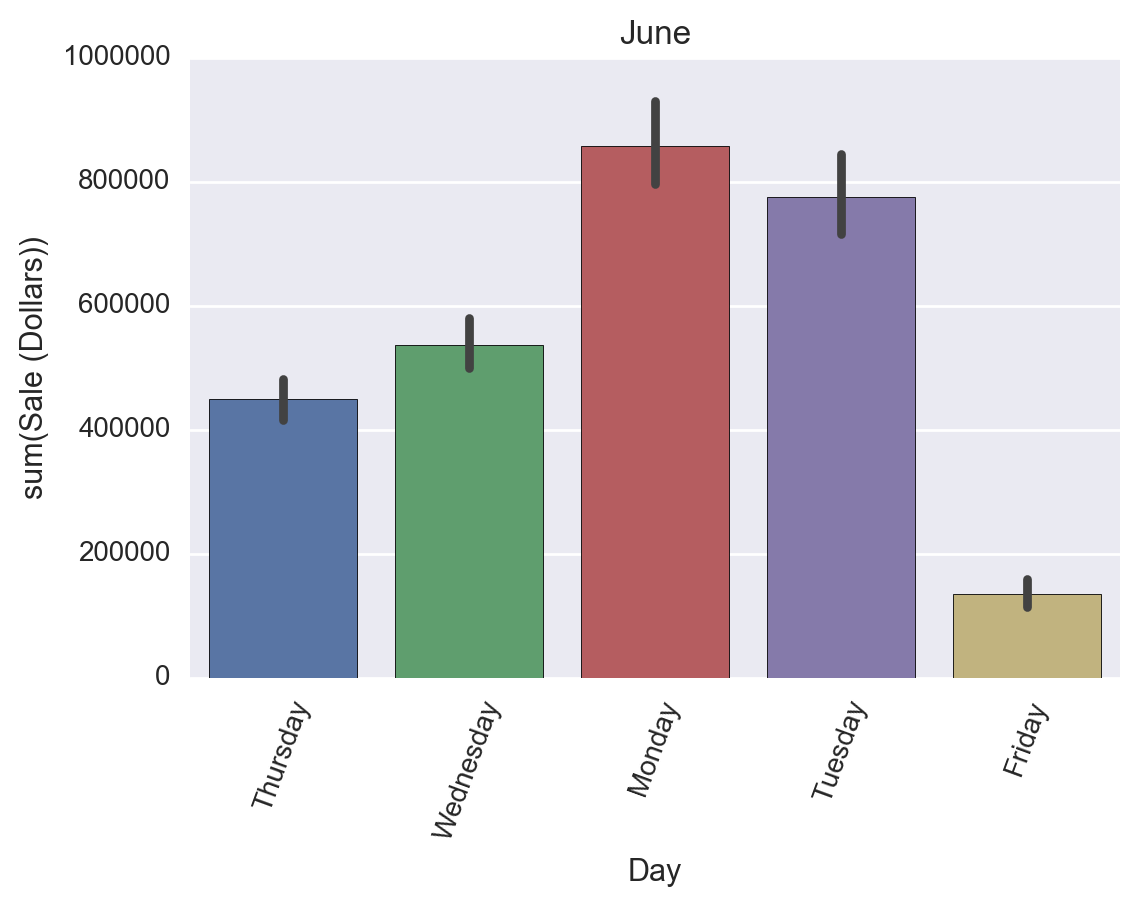

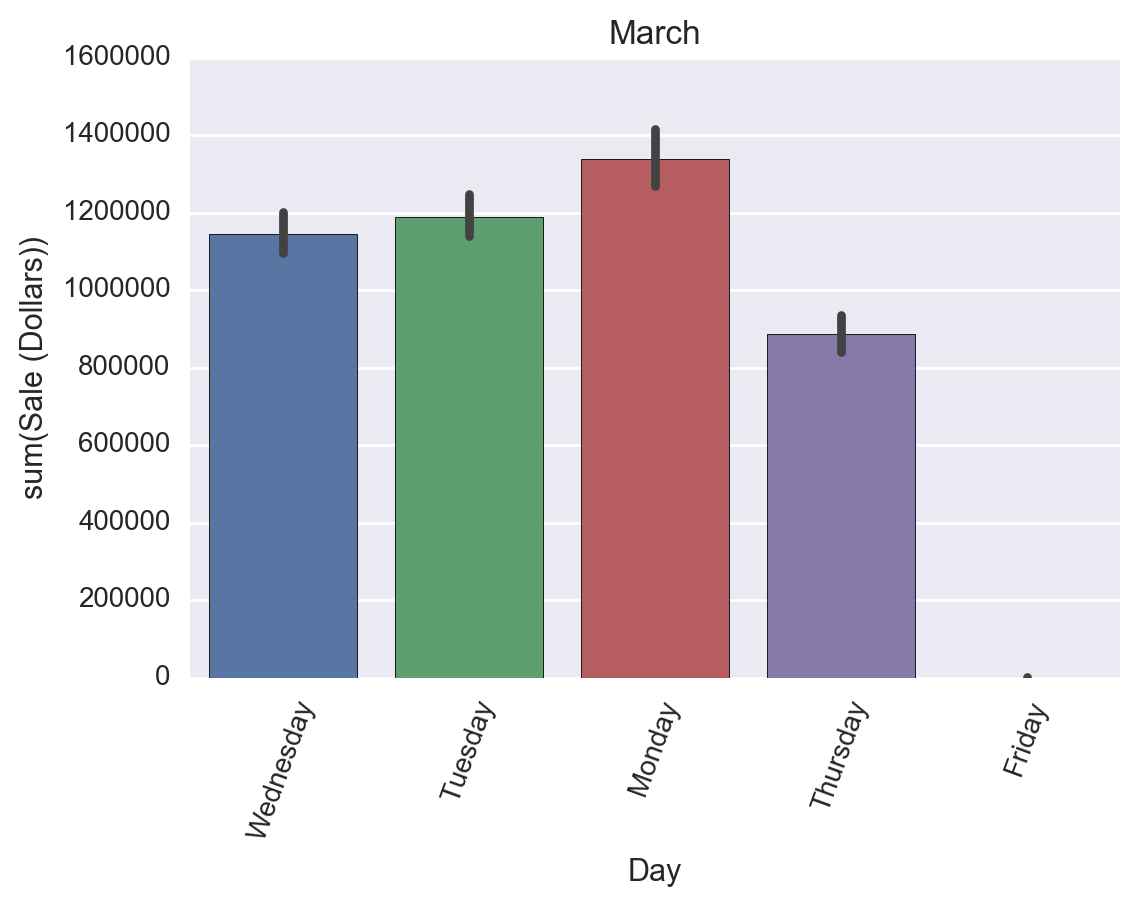

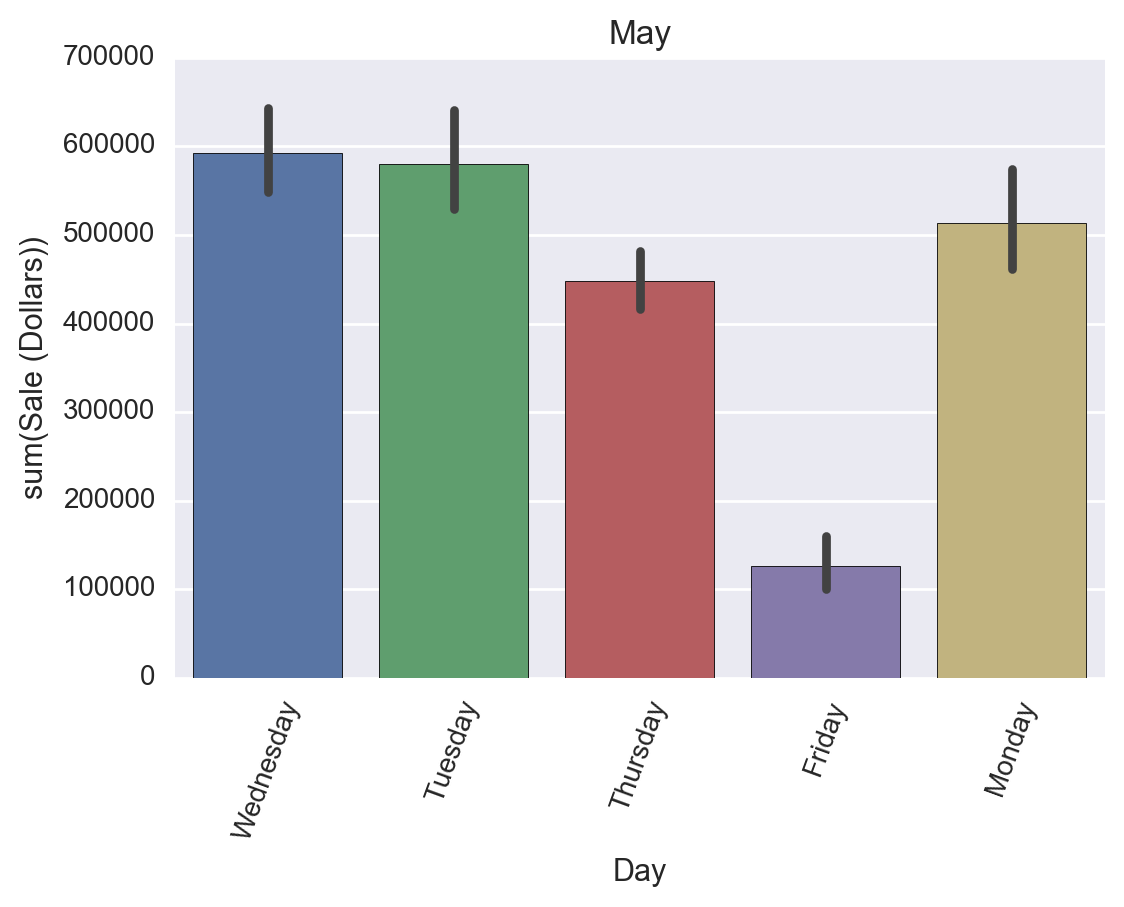

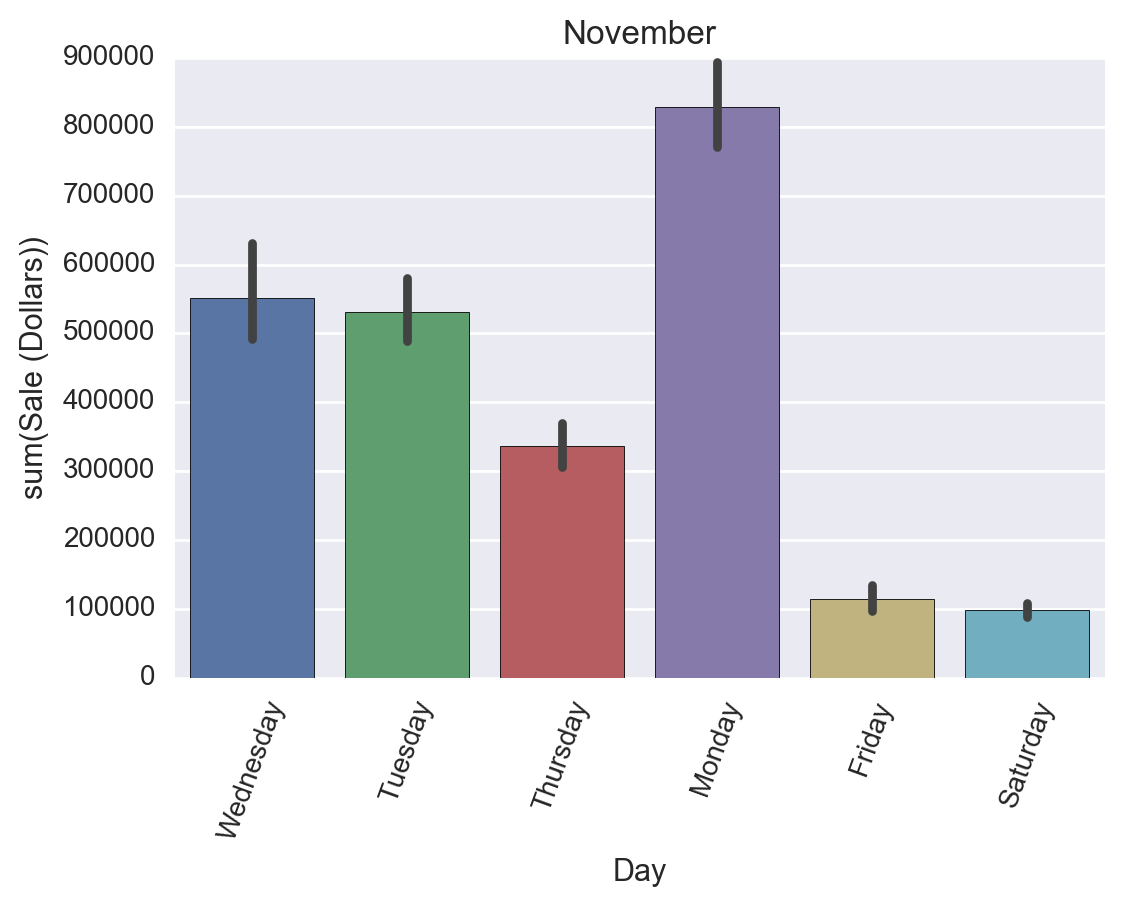

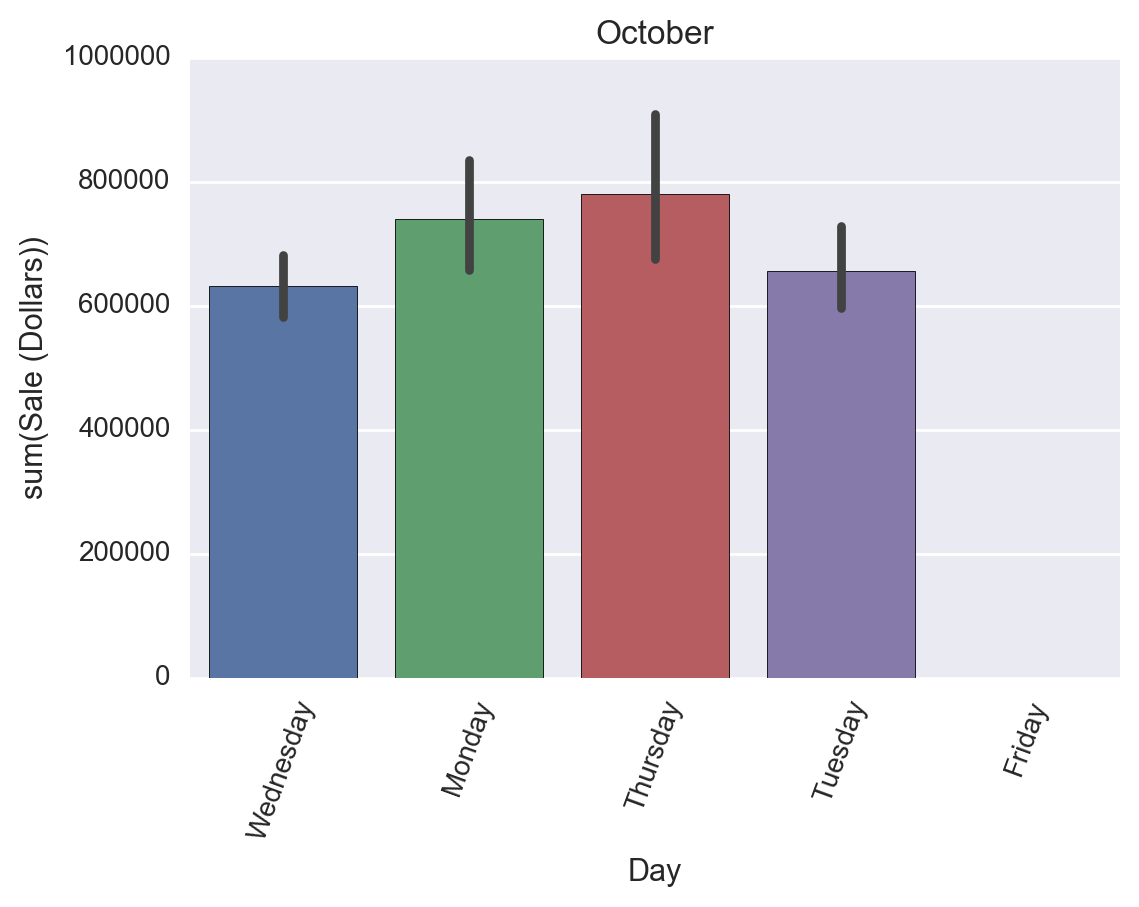

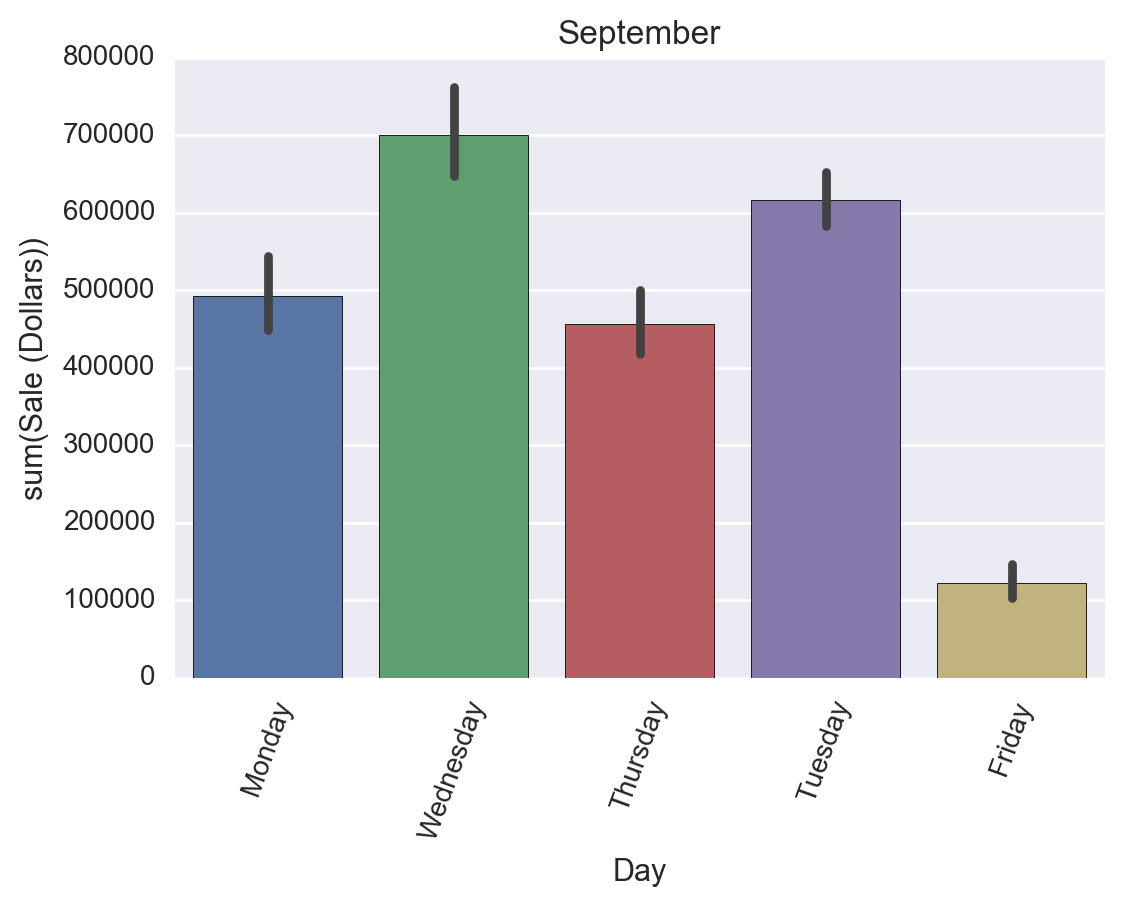

In [124]:
for i, group in iowa_sales.groupby('Month'):
    plt.figure()
    sns.barplot(x="Day", y="Sale (Dollars)", data=group, estimator=sum)
    plt.title(str(i))
    plt.xticks(rotation=70)




In [208]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] #No Sunday Sales.
month_grps = iowa_sales.groupby('Month')
day_month_grps = month_grps.get_group(month_list[11]).groupby('Day')['Sale (Dollars)'].sum()
print set(iowa_sales['Day'])
print iowa_sales.groupby('Day')['Sale (Dollars)']
def get_dayly_data_by_month(Month):
    day_month_grps = month_grps.get_group(Month).groupby('Day')
    days = []
    for day in range(0, len(day_list)):
        try:
            days.append(day_month_grps.get_group(day_list[day])['Sale (Dollars)'].sum())
        except:
            days.append(0)
#     mon = day_month_grps.get_group('Monday')['Sale (Dollars)'].sum()
#     tue = day_month_grps.get_group('Tuesday')['Sale (Dollars)'].sum()
#     wed = day_month_grps.get_group('Wednesday')['Sale (Dollars)'].sum()
#     thu = day_month_grps.get_group('Thursday')['Sale (Dollars)'].sum()
#     fri = day_month_grps.get_group('Friday')['Sale (Dollars)'].sum()
    #sat = day_month_grps.get_group('Saturday')['Sale (Dollars)'].sum()
    #sun = day_month_grps.get_group('Sun')['Sale (Dollars)'].sum()
    return days

for month in month_list:
    print month, get_dayly_data_by_month(month)


set(['Monday', 'Tuesday', 'Friday', 'Wednesday', 'Thursday', 'Saturday'])
January [870786.2100000071, 884399.5100000077, 980194.9300000113, 802706.5400000096, 200496.97000000015, 0]
February [1300284.9300000004, 946011.7800000054, 1152561.840000011, 853509.9400000051, 0, 0]
March [1339118.7500000065, 1189025.1000000034, 1145835.0200000117, 887586.2100000053, 775.72, 0]
April [624025.1100000044, 486899.34000000183, 658226.5700000041, 533415.6000000028, 0, 0]
May [513212.2900000038, 580070.9400000026, 592381.0600000037, 447648.3000000023, 126403.51, 0]
June [858398.2700000086, 774920.6000000059, 537371.6500000035, 449293.89000000217, 134976.53999999975, 0]
July [568085.7600000044, 528857.2200000035, 609466.840000004, 469512.3200000026, 0, 0]
August [708592.5400000059, 492065.63000000204, 561341.3800000033, 402607.3100000019, 146.85999999999999, 0]
September [492533.1000000038, 616147.2800000041, 700154.3600000073, 456227.1700000016, 122857.00999999997, 0]
October [740068.5700000036, 6565

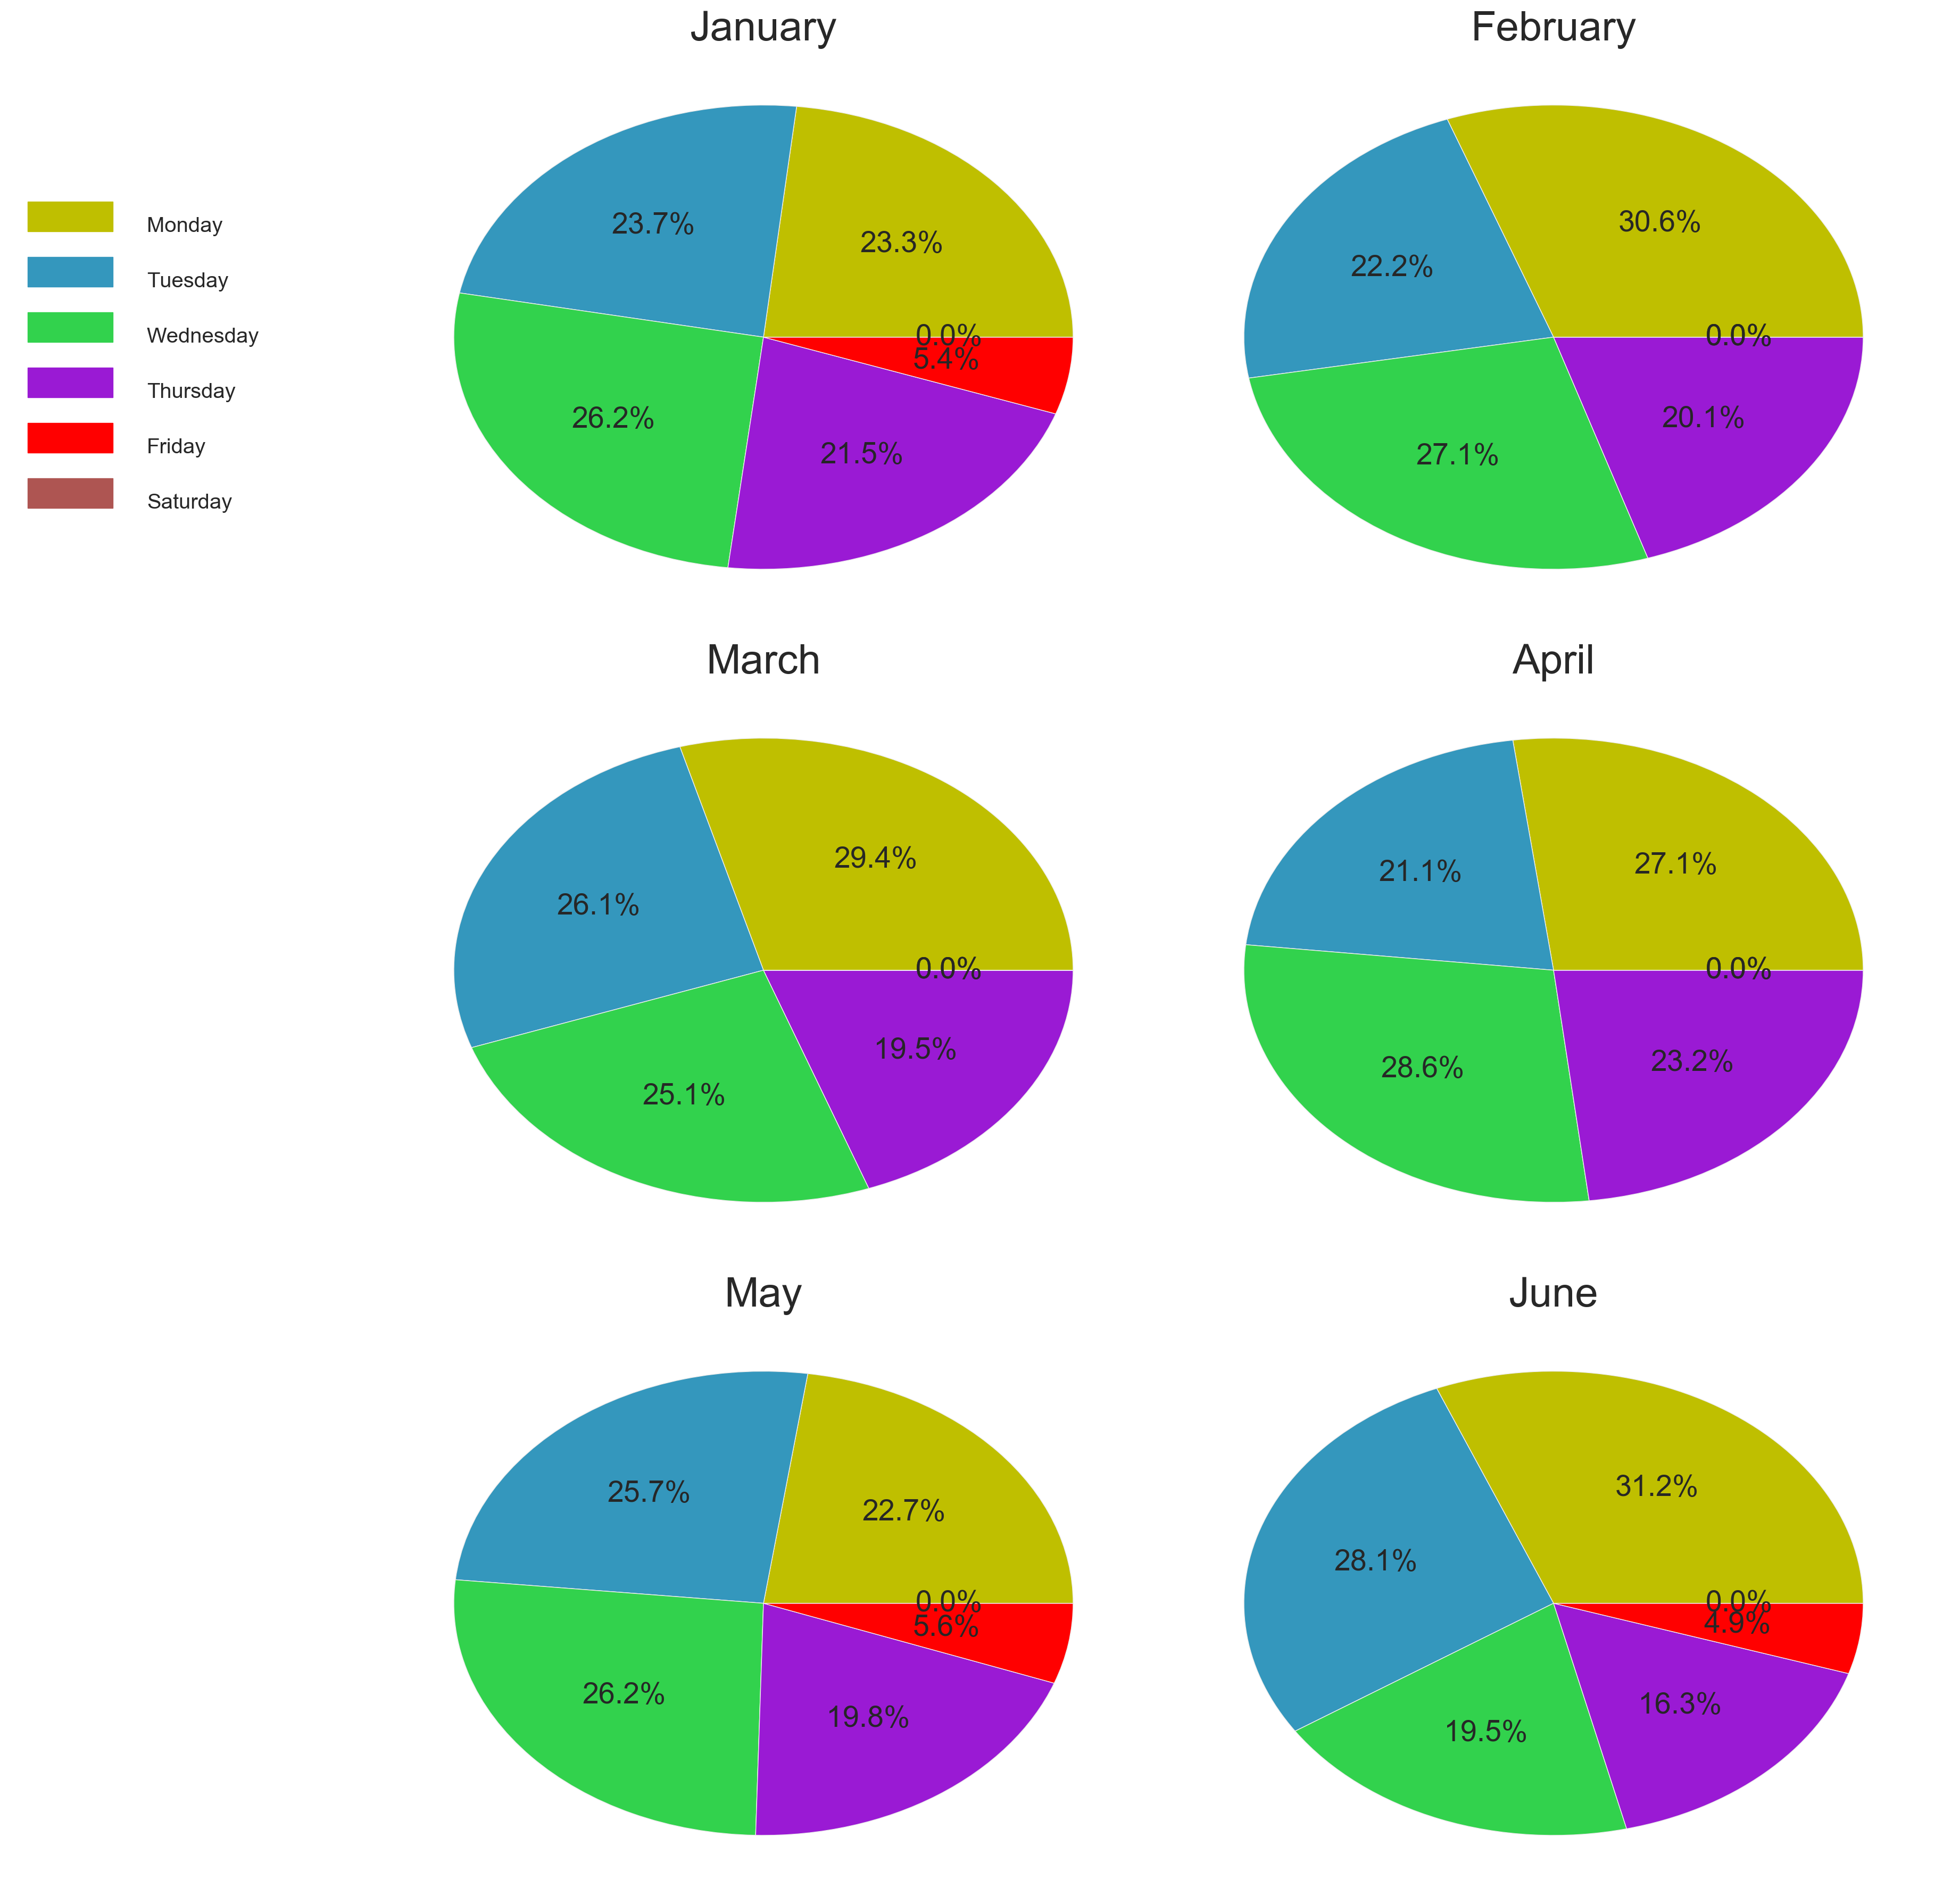

In [307]:
import matplotlib.patches as mpatches
def get_dayly_sums_by_month(Month):
    day_month_grps = month_grps.get_group(Month).groupby('Day')
    days = []
    for day in range(0, len(day_list)):
        try:
            days.append(day_month_grps.get_group(day_list[day])['Sale (Dollars)'].sum())
        except:
            days.append(0)
    return days




days = get_dayly_sums_by_month('May')
#print df.head()
# Create a list of colors (from iWantHue)
colors = ["y", "#3497bd", "#32d24d", "#9a1ad4", "r", "#AE5552"]
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create a pie chart
#plt.pie(days, labels=days_of_week, shadow=False, colors=colors, autopct='%1.1f%%')

month_list = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
font_size=28
plt.rcParams['font.size'] = 20.0
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(15, 18))
ax1.pie(get_dayly_sums_by_month('January'), shadow=False, colors=colors, autopct='%1.1f%%')
ax1.set_title('January', fontsize=font_size)
ax2.pie(get_dayly_sums_by_month('February'), shadow=False, colors=colors, autopct='%1.1f%%')
ax2.set_title('February', fontsize=font_size)
ax3.pie(get_dayly_sums_by_month('March'), shadow=False, colors=colors, autopct='%1.1f%%')
ax3.set_title('March', fontsize=font_size)
ax4.pie(get_dayly_sums_by_month('April'), shadow=False, colors=colors, autopct='%1.1f%%')
ax4.set_title('April', fontsize=font_size)
ax5.pie(get_dayly_sums_by_month('May'), shadow=False, colors=colors, autopct='%1.1f%%')
ax5.set_title('May', fontsize=font_size)
ax6.pie(get_dayly_sums_by_month('June'), shadow=False, colors=colors, autopct='%1.1f%%')
ax6.set_title('June', fontsize=font_size)
# ax7.pie(days, labels=days_of_week, shadow=False, colors=colors, autopct='%1.1f%%')
# ax8.pie(days, labels=days_of_week, shadow=False, colors=colors, autopct='%1.1f%%')
# ax9.pie(days, labels=days_of_week, shadow=False, colors=colors, autopct='%1.1f%%')
# ax10.pie(days, labels=days_of_week, shadow=False, colors=colors, autopct='%1.1f%%')
# ax11.pie(days, labels=days_of_week, shadow=False, colors=colors, autopct='%1.1f%%')
# ax12.pie(days, labels=days_of_week, shadow=False, colors=colors, autopct='%1.1f%%')

# monday = mpatches.Patch(color='#1c18a1', label='Monday')
# tuesday = mpatches.Patch(color='#3497bd', label='Tuesday')
# wednesday = mpatches.Patch(color='red', label='Wednesday')
ax1.legend(handles=[mpatches.Patch(color=color, label=day) for color, day in zip(colors, days_of_week)],
           fontsize='x-large', loc=2, bbox_to_anchor=(-0.5, .8))




# View the plot drop above
# plt.axis('equal')
# plt.title('Month')
plt.style.use('ggplot')
# View the plot
plt.tight_layout()
plt.show()

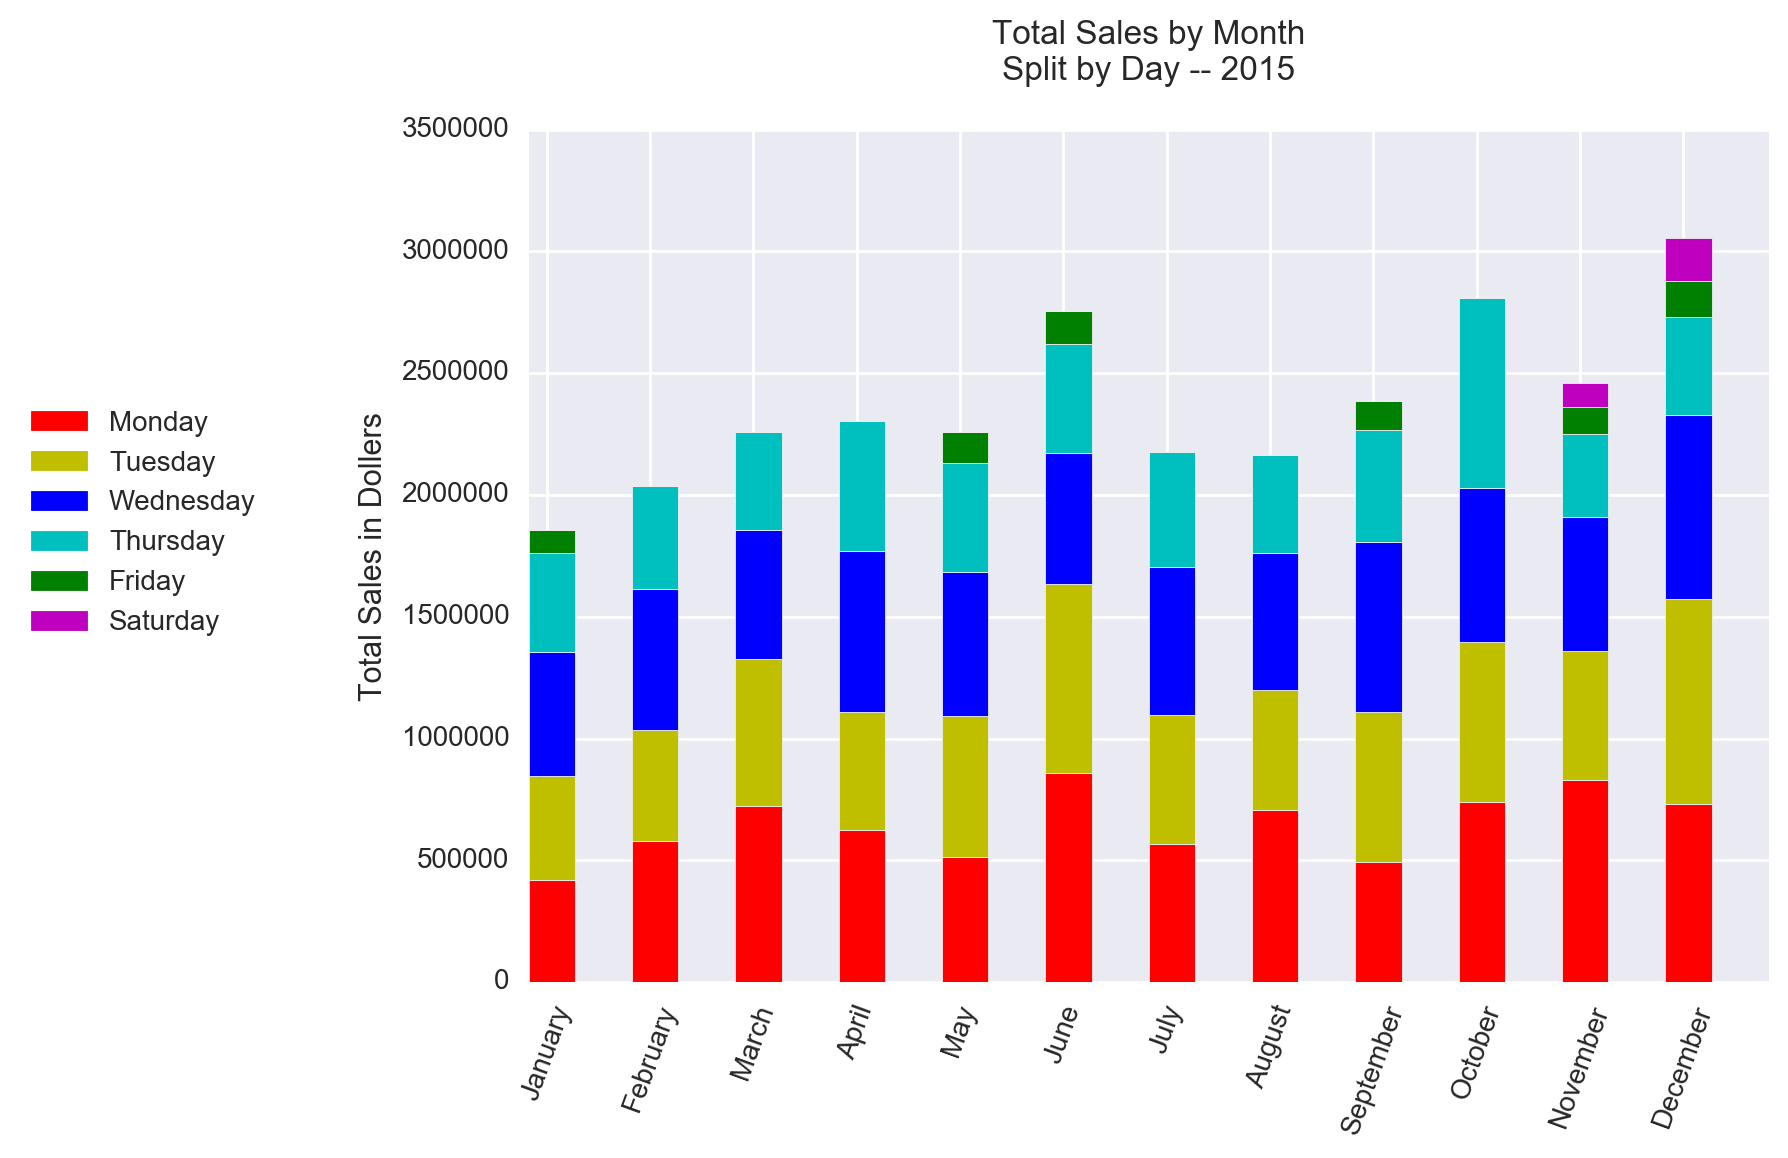

In [498]:
#sns.set(style="whitegrid")
sns.set(style="darkgrid")
month_list = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
month_list_nums = np.arange(12)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = ['r', 'y', 'b', 'c', 'g', 'm']
iowa_sales['Month'] = [date.strftime("%B") for date in iowa_sales['Date']]


iowa_sales_2015 = iowa_sales[iowa_sales['Year']==2015]
iowa_sales_2015.head()
month_grps = iowa_sales_2015.groupby('Month')

def get_dayly_sums_by_month(Month):
    day_month_grps = month_grps.get_group(Month).groupby('Day')
    days = []
    for day in range(0, len(day_list)):
        try:
            days.append(day_month_grps.get_group(day_list[day])['Sale (Dollars)'].sum())
        except:
            days.append(0)
    return days

def make_plot_for_idc(ind, day_sums):
    width = 0.45 
    p1 = plt.bar(ind, day_sums[0], width, color='r')
    p2 = plt.bar(ind, day_sums[1], width, color='y',
                 bottom=day_sums[0])
    p3 = plt.bar(ind, day_sums[2], width, color='b',
                 bottom=day_sums[0]+day_sums[1])
    p4 = plt.bar(ind, day_sums[3], width, color='c',
                 bottom=day_sums[0]+day_sums[1]+day_sums[2])
    p5 = plt.bar(ind, day_sums[4], width, color='g',
                 bottom=day_sums[0]+day_sums[1]+day_sums[2]+day_sums[3])
    p6 = plt.bar(ind, day_sums[5], width, color='m', bottom=day_sums[0]+day_sums[1]+day_sums[2]+day_sums[3]+day_sums[4])

for x in range(len(month_list)):
    day_sums = get_dayly_sums_by_month(month_list[x])
    make_plot_for_idc(x, day_sums)

plt.legend(handles=[mpatches.Patch(color=color, label=day) for color, day in zip(colors, days_of_week)],
            loc=0, bbox_to_anchor=(-0.2, .7))

ind = np.arange(12)
plt.xticks(ind + width/2., month_list, rotation=70)
plt.ylabel('Total Sales in Dollers')
plt.title('Total Sales by Month\nSplit by Day -- 2015\n')


plt.show()





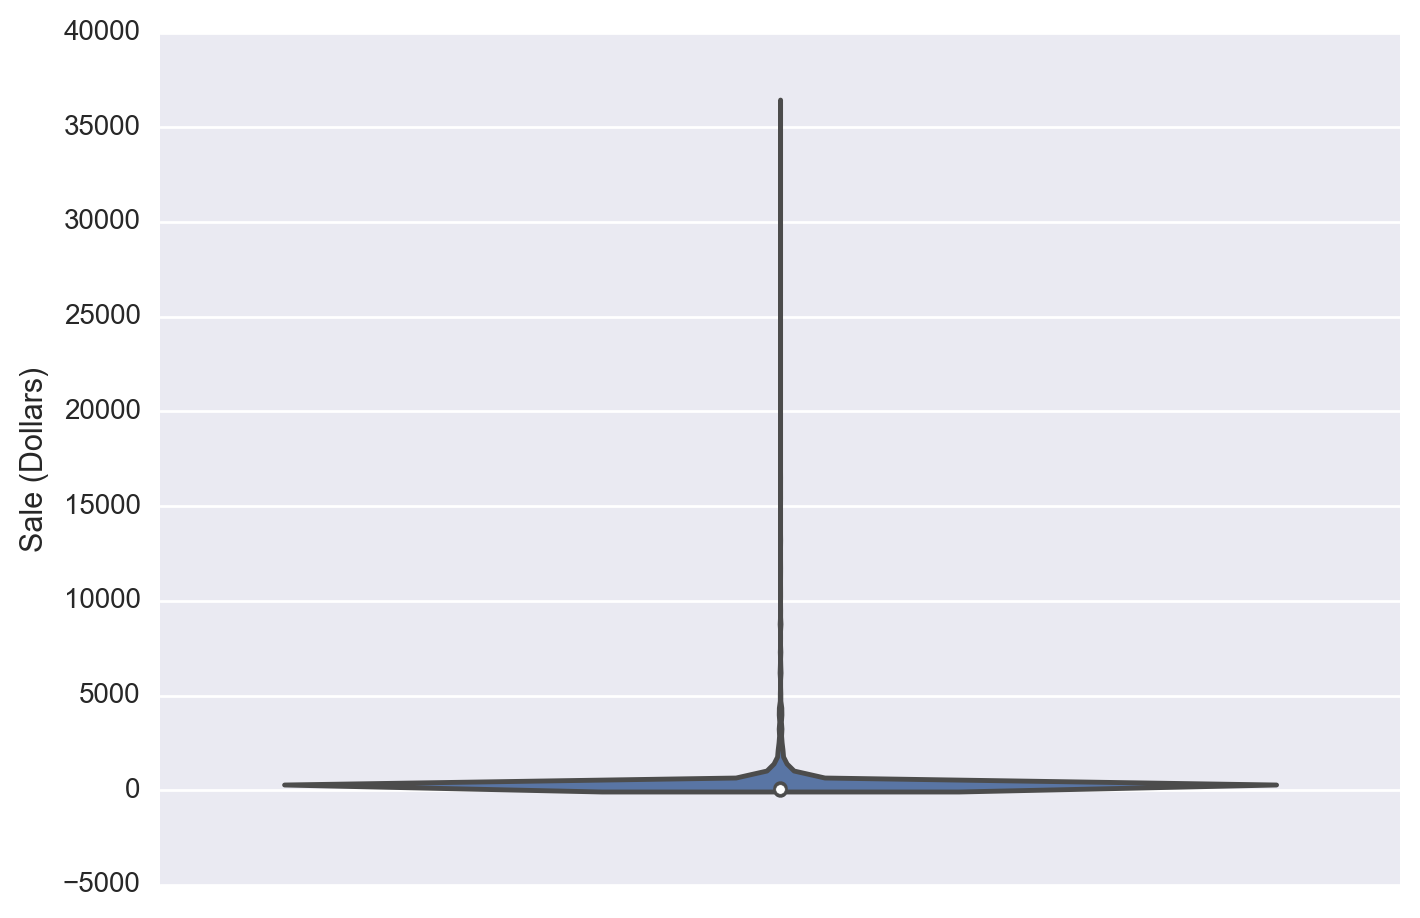

In [503]:
iowa_sales_2015 = iowa_sales[iowa_sales['Year']==2015]
iowa_sales_2015.groupby('Month')
sns.violinplot(data=iowa_sales_2015, y='Sale (Dollars)')


Exception: Column(s) Sale (Dollars) already selected

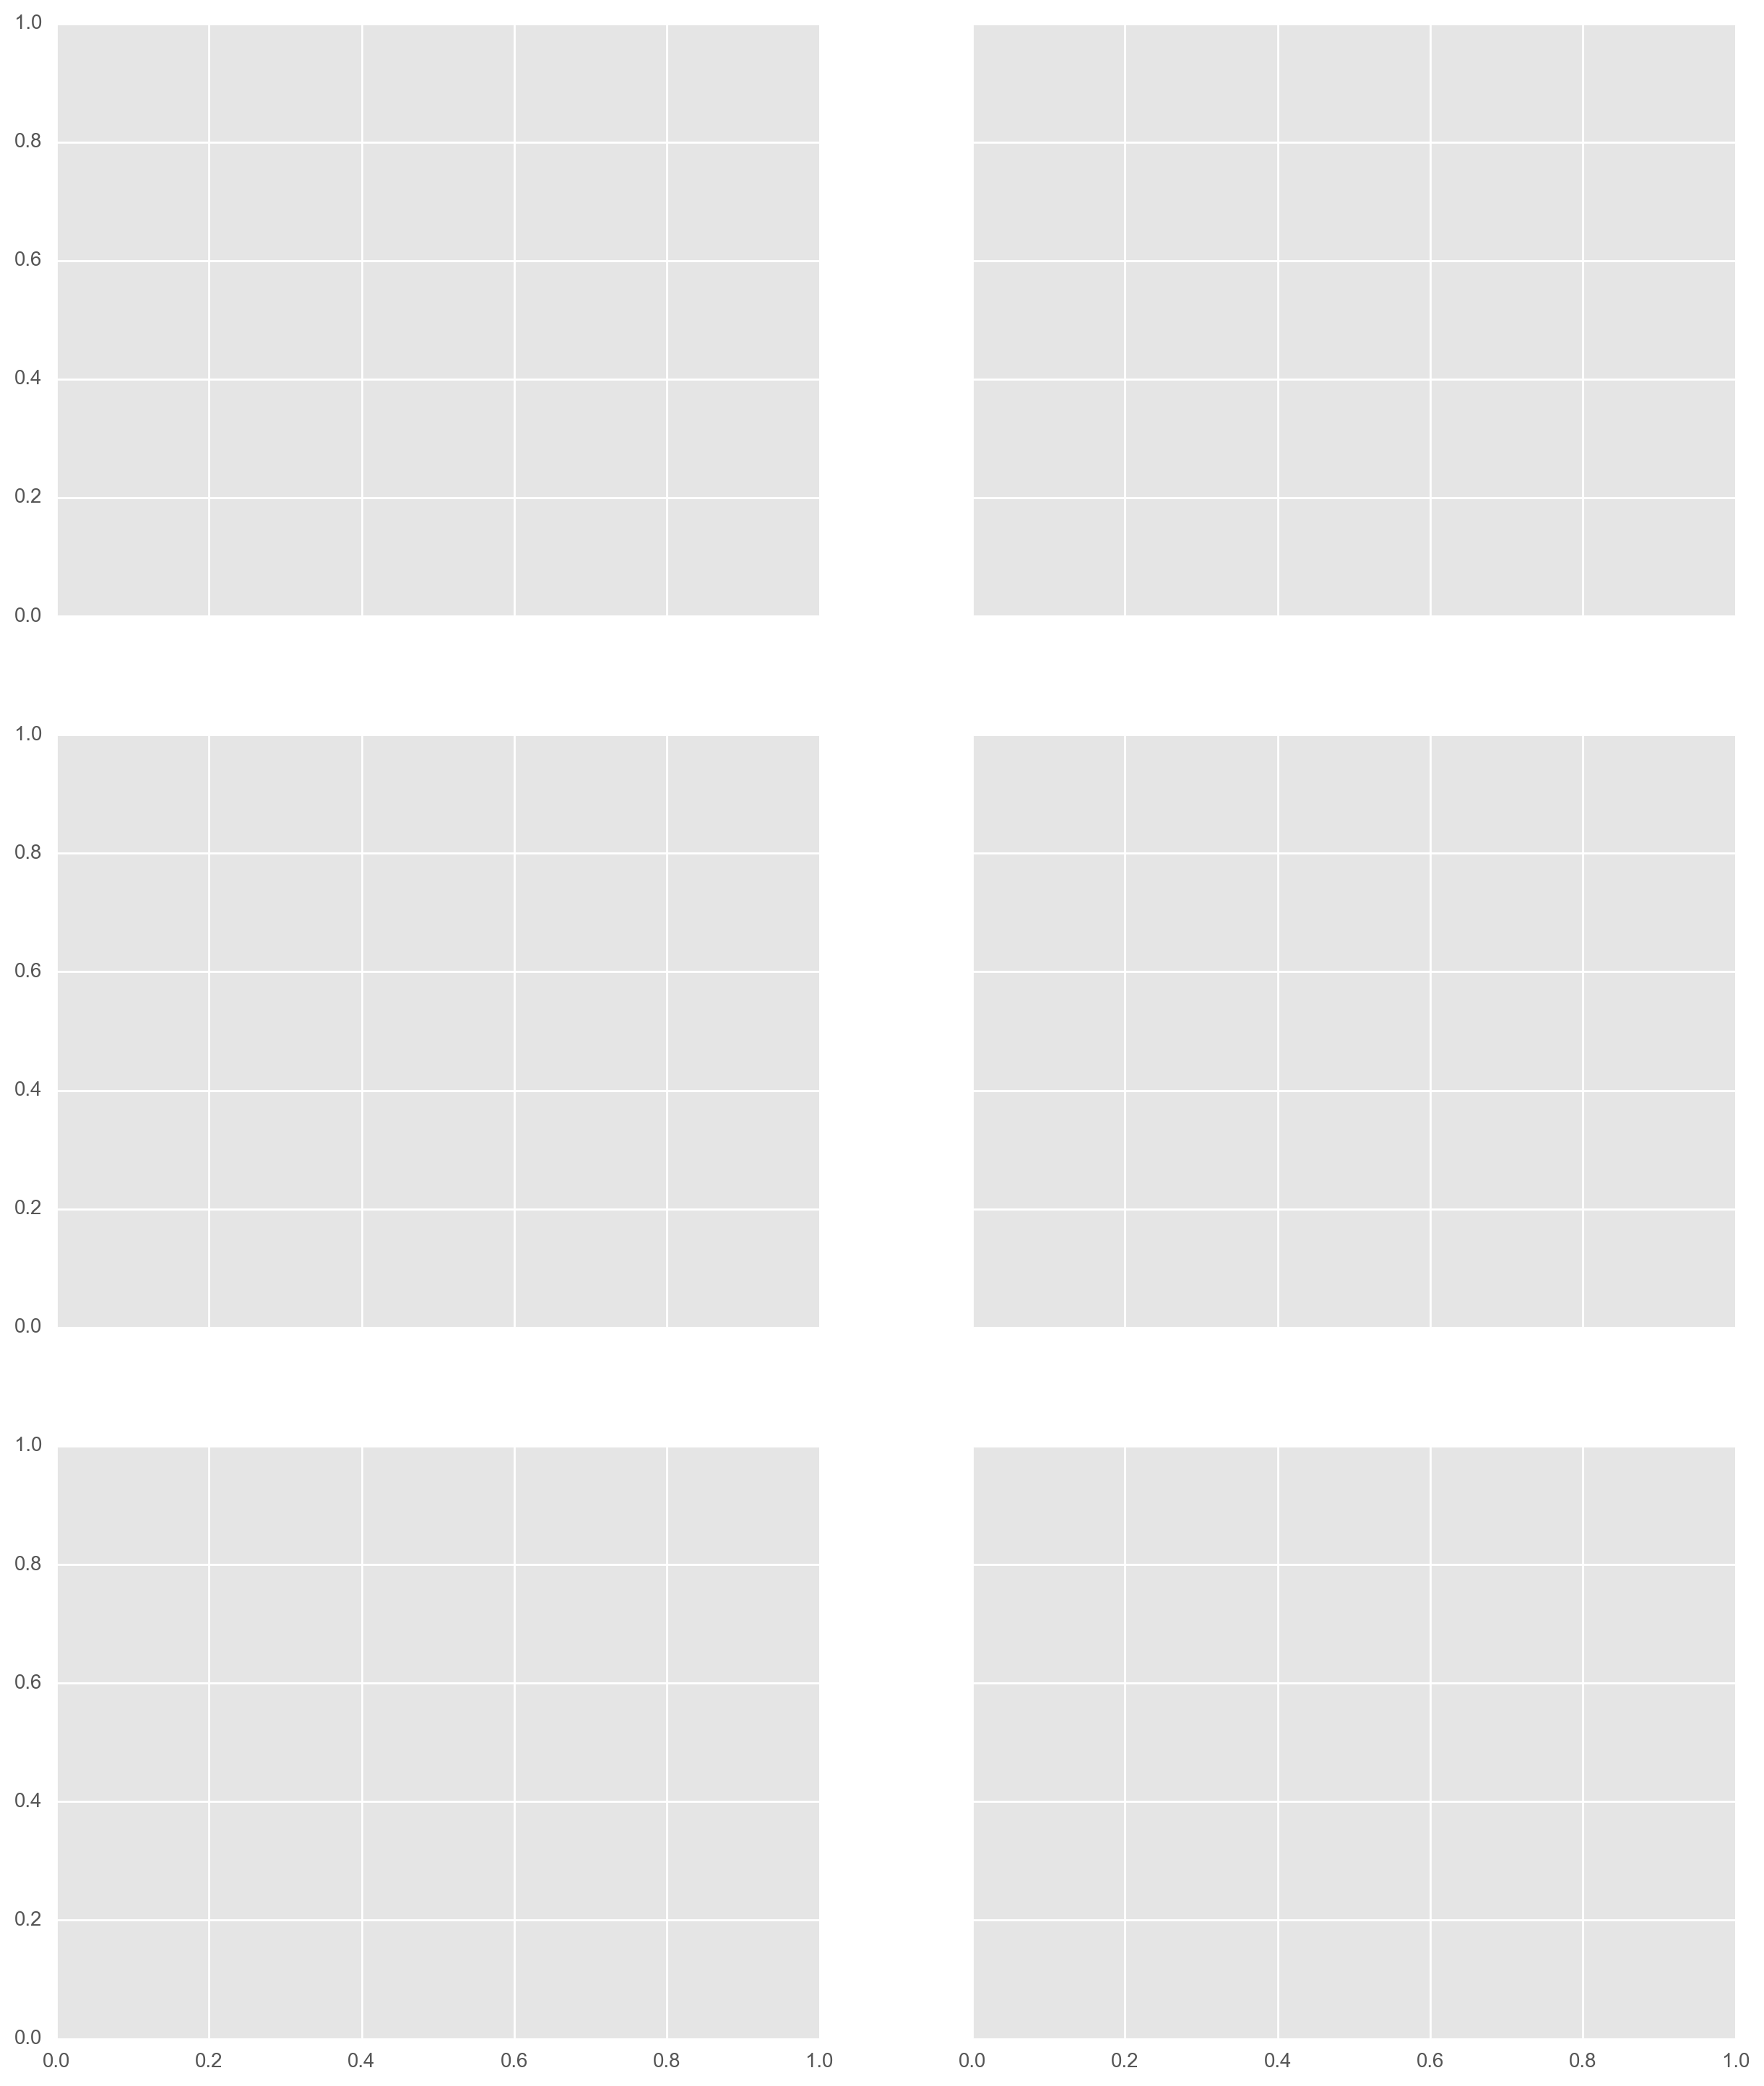

In [329]:
import matplotlib.patches as mpatches
# def get_dayly_sums_by_month(Month):
#     day_month_grps = month_grps.get_group(Month).groupby('Day')
#     days = []
#     for day in range(0, len(day_list)):
#         try:
#             days.append(day_month_grps.get_group(day_list[day])['Sale (Dollars)'].sum())
#         except:
#             days.append(0)
#     return days



# days = get_dayly_sums_by_month('May')

month_grps = iowa_sales.groupby('Month')

# Create a list of colors (from color palat)
colors = ["y", "#3497bd", "#32d24d", "#9a1ad4", "r", "#AE5552"]
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

month_list = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
font_size=28
plt.rcParams['font.size'] = 20.0
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(15, 18))
mydata = month_grps['Sale (Dollars)']

ax1.boxplot(mydata)


# ax1.legend(handles=[mpatches.Patch(color=color, label=day) for color, day in zip(colors, days_of_week)],
#            fontsize='x-large', loc=2, bbox_to_anchor=(-0.5, .8))




# View the plot drop above
# plt.axis('equal')
# plt.title('Month')
plt.style.use('ggplot')
# View the plot
plt.tight_layout()
plt.show()

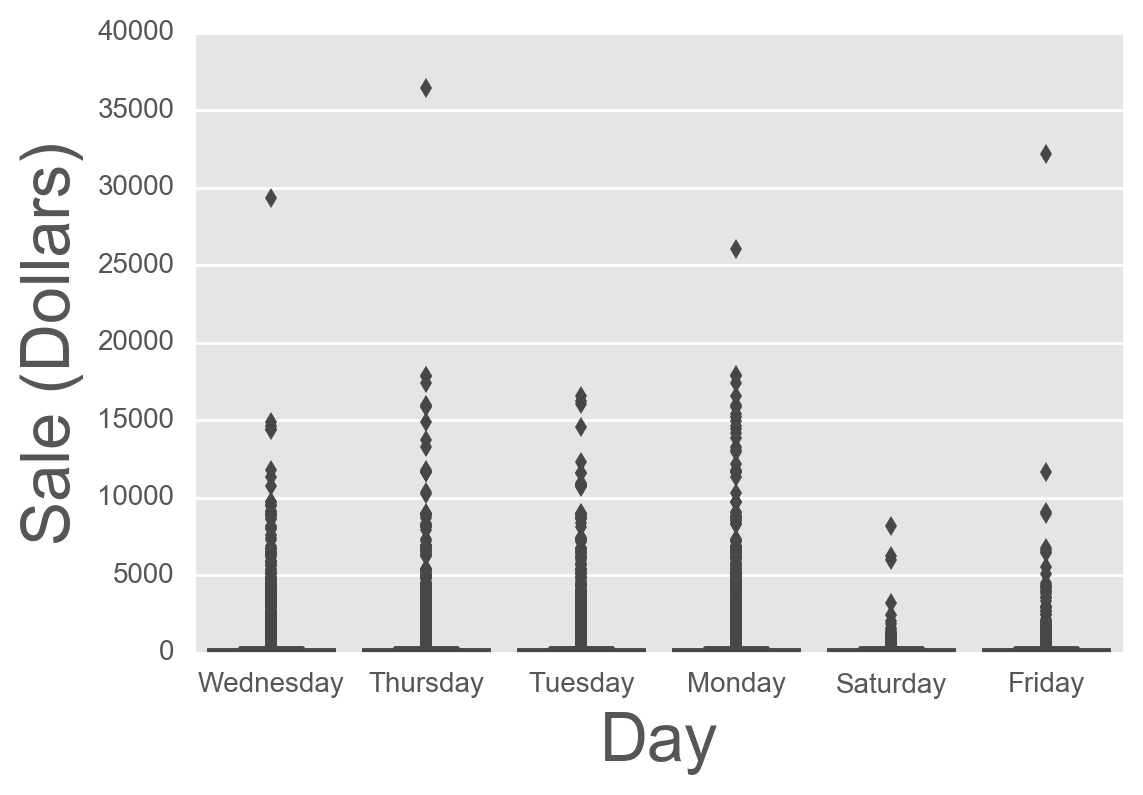

In [332]:
sns.boxplot(x="Day", y='Sale (Dollars)', data=iowa_sales)

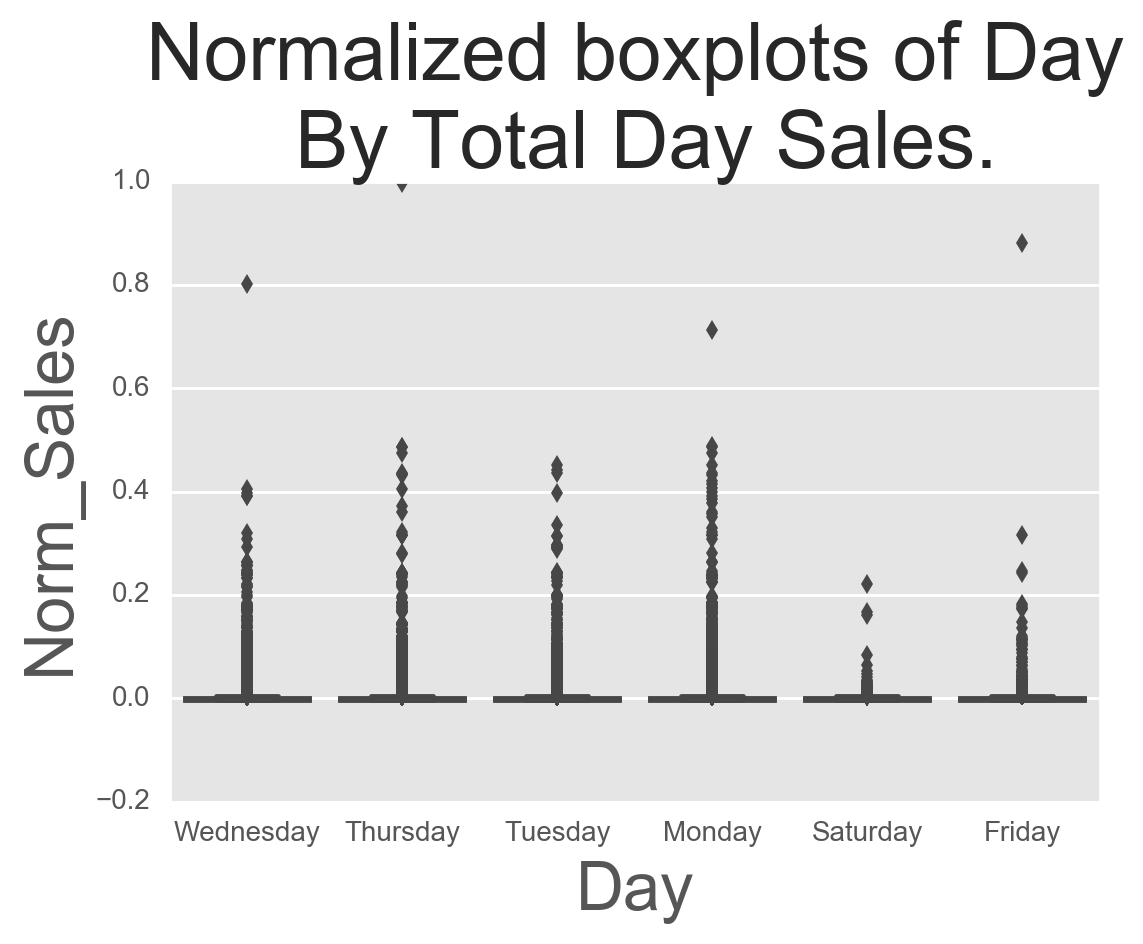

In [340]:
diff = (iowa_sales['Sale (Dollars)'].max() - iowa_sales['Sale (Dollars)'].min())
iowa_sales['Norm_Sales'] = (iowa_sales['Sale (Dollars)'] - iowa_sales['Sale (Dollars)'].mean()) / (diff)
sns.boxplot(x="Day", y='Norm_Sales', data=iowa_sales)
plt.title('Normalized boxplots of Day\n By Total Day Sales.')

In [346]:
iowa_sales[iowa_sales['Sale (Dollars)']==iowa_sales['Sale (Dollars)'].max()]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Day,Month,Norm_Sales
40615,2015-10-01,2633,DES MOINES,50320,77.0,Polk,1011300.0,TENNESSEE WHISKIES,85,26827,...,1000,18.38,27.57,1320,36392.4,1320.0,348.71,Thursday,October,0.996495


In [388]:
# import seaborn as sns
# sns.set(style="darkgrid")
big_days = sorted(iowa_sales.groupby('Date')['Sale (Dollars)'].sum(), reverse=True)[0:20]
mean_day = iowa_sales.groupby('Date')['Sale (Dollars)'].sum().mean()
alldays = iowa_sales.groupby('Date')['Sale (Dollars)'].sum().sum()
num_of_days = len(set(iowa_sales['Date']))

print "Mean total day sales:",mean_day, "Sum of top 20 days:", sum(big_days),"\n"

print "The top 20 days countribute to", sum(big_days)/alldays, "percent of the total sales.\nThe 20 days are", 20.0/num_of_days, "percent of the total",num_of_days, "days"

 Mean total day sales: 127469.864781 Sum of top 20 days: 4022341.24 

The top 20 days countribute to 0.115165082692 percent of the total sales.
The 20 days are 0.0729927007299 percent of the total 274 days


In [469]:
iowa_sales_2015 = iowa_sales[iowa_sales['Year']==2015].groupby('Date')['Sale (Dollars)'].sum()
iowa_sales_2016 = iowa_sales[iowa_sales['Year']==2016].groupby('Date')['Sale (Dollars)'].sum()


iowa_sales['Weeks'] = iowa_sales['Date'].apply(lambda x: x.week)
df2015 = day_sales_2015.reset_index()
df2016 = day_sales_2016.reset_index()


plt.plot(df2015['Date'], df2015['Sale (Dollars)'], color='r')
plt.plot(df2016['Date'], df2016['Sale (Dollars)'], color='k')

colors = ['r', 'k']
years = ['2015','2016']
plt.xticks(rotation=70)
plt.legend(handles=[mpatches.Patch(color=color, label=day) for color, day in zip(colors, years)],
           fontsize='x-large')




KeyError: 'Date'

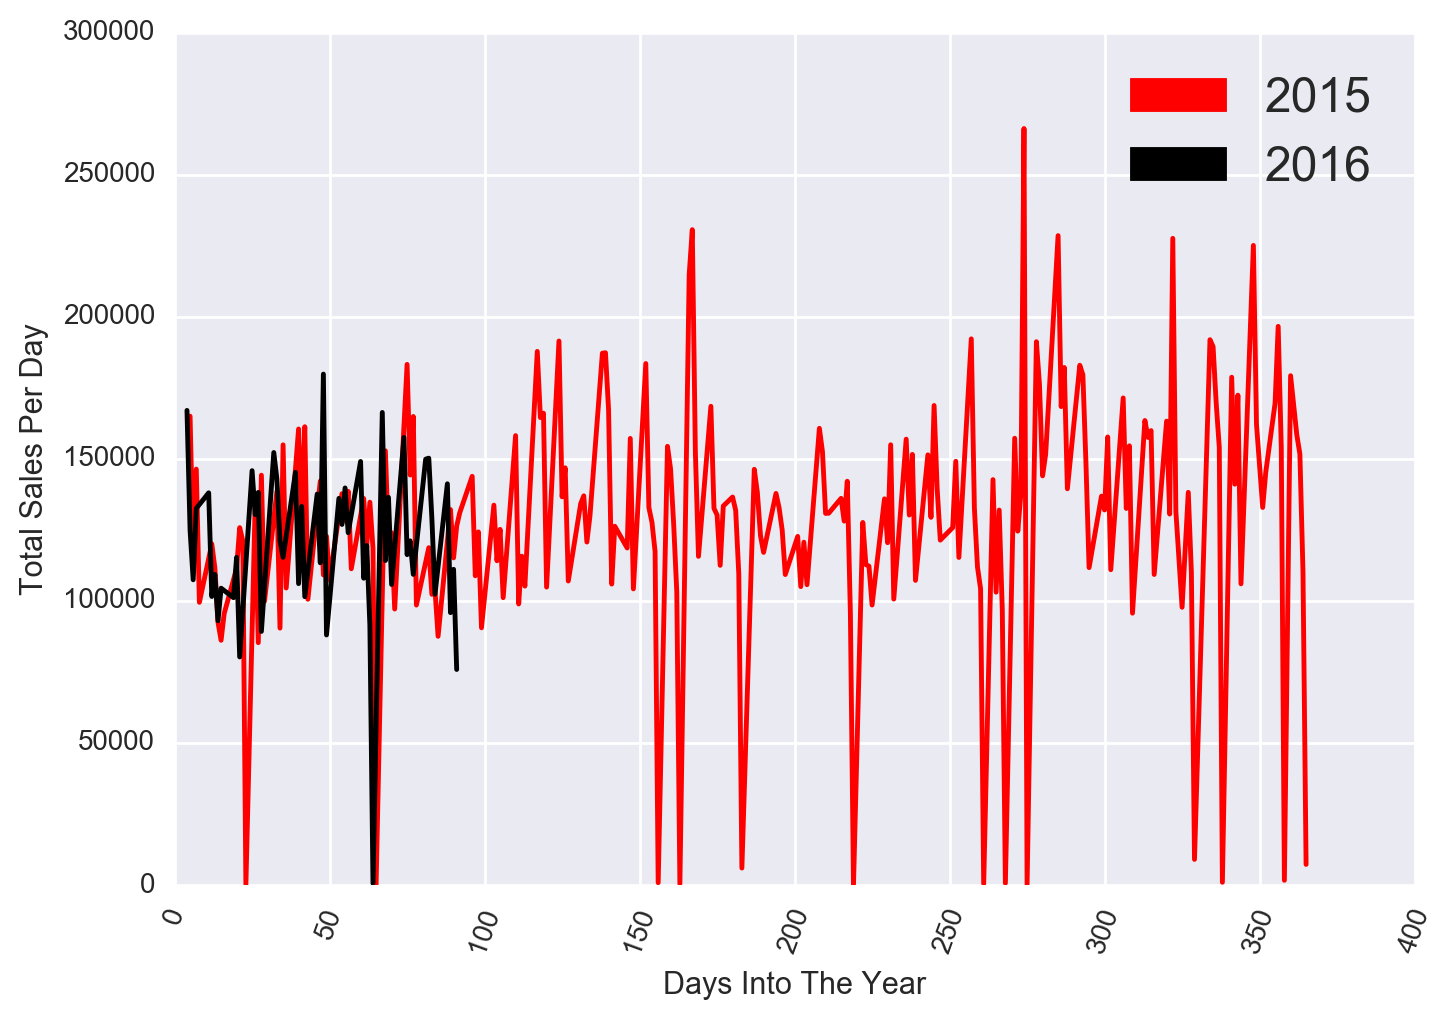

In [471]:
day_sales_2015 = iowa_sales[iowa_sales['Year']==2015].groupby('Day_count')['Sale (Dollars)'].sum()
day_sales_2016 = iowa_sales[iowa_sales['Year']==2016].groupby('Day_count')['Sale (Dollars)'].sum()

df2015 = day_sales_2015.reset_index()
df2016 = day_sales_2016.reset_index()


plt.plot(df2015['Day_count'], df2015['Sale (Dollars)'], color='r')
plt.plot(df2016['Day_count'], df2016['Sale (Dollars)'], color='k')

colors = ['r', 'k']
years = ['2015','2016']
plt.xticks(rotation=70)
plt.legend(handles=[mpatches.Patch(color=color, label=day) for color, day in zip(colors, years)],
           fontsize='x-large')

plt.xlabel('Days Into The Year')
plt.ylabel('Total Sales Per Day')




  Day_count  Sale (Dollars)
0       004       167162.93
1       005       124911.66
2       006       107556.85
3       007       132674.48
4       011       138166.87


'091'

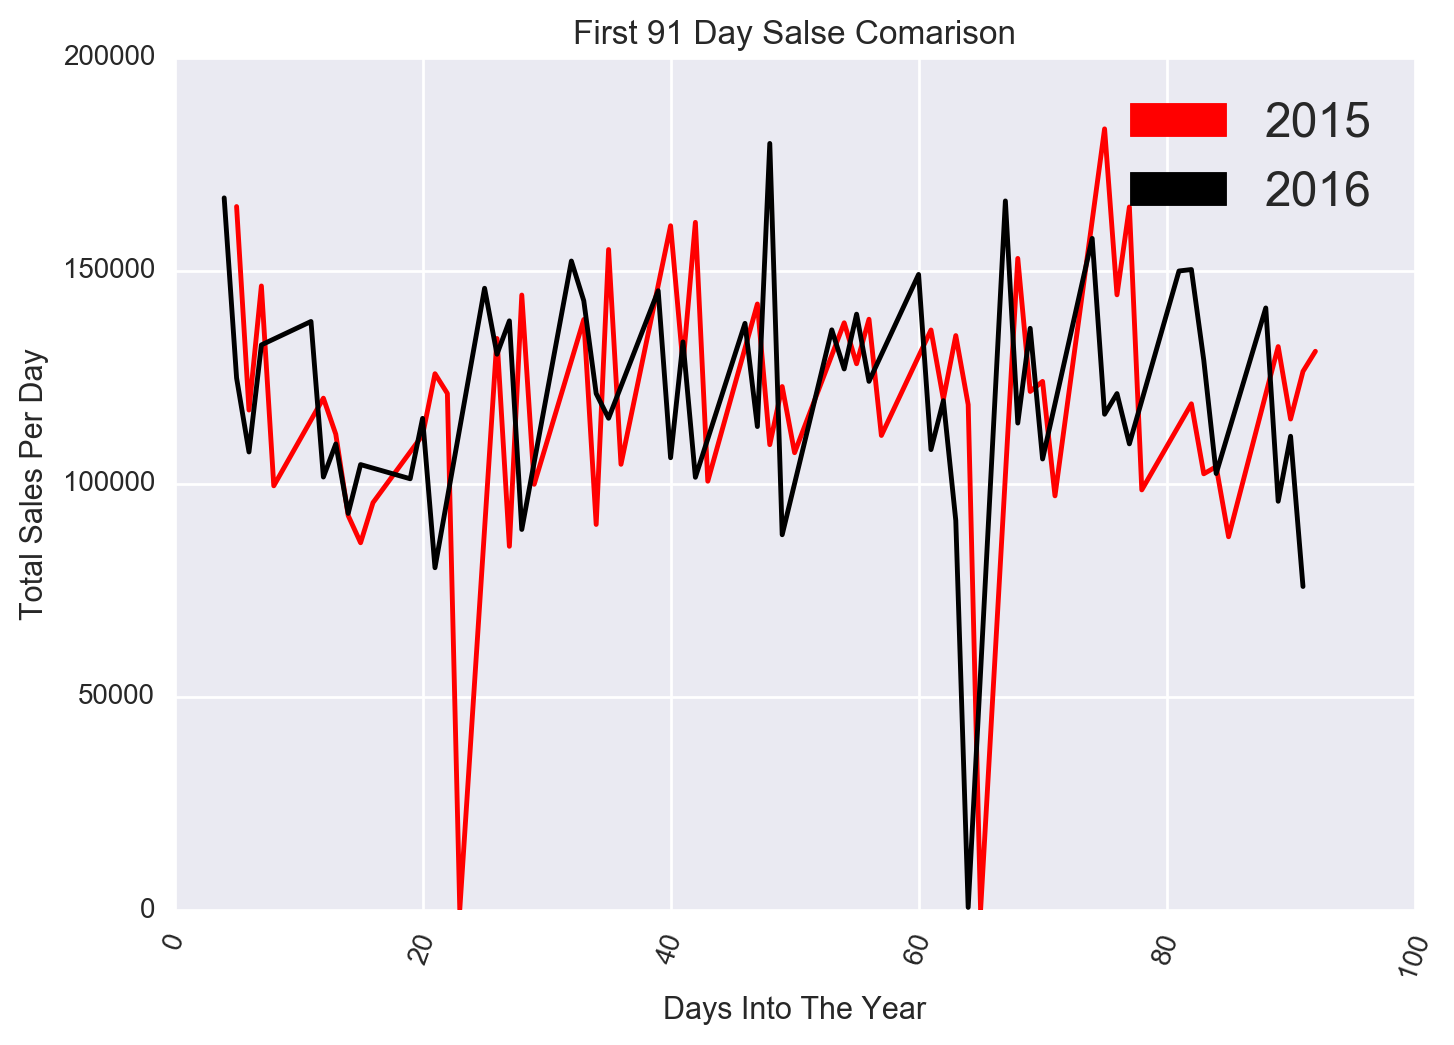

In [474]:
day_sales_2015 = iowa_sales[iowa_sales['Year']==2015].groupby('Day_count')['Sale (Dollars)'].sum()
day_sales_2016 = iowa_sales[iowa_sales['Year']==2016].groupby('Day_count')['Sale (Dollars)'].sum()

df2015 = day_sales_2015.reset_index()
df2016 = day_sales_2016.reset_index()

print df2016.head()
df2015_first91 = df2015[df2015['Day_count']<='092']
df2016_first91 = df2016[df2016['Day_count']<='092']

plt.plot(df2015_first91['Day_count'], df2015_first91['Sale (Dollars)'], color='r')
plt.plot(df2016_first91['Day_count'], df2016_first91['Sale (Dollars)'], color='k')

colors = ['r', 'k']
years = ['2015','2016']
plt.xticks(rotation=70)
plt.legend(handles=[mpatches.Patch(color=color, label=day) for color, day in zip(colors, years)],
           fontsize='x-large')

plt.xlabel('Days Into The Year')
plt.ylabel('Total Sales Per Day')
plt.title('First 91 Day Salse Comarison')
df2016['Day_count'].max()



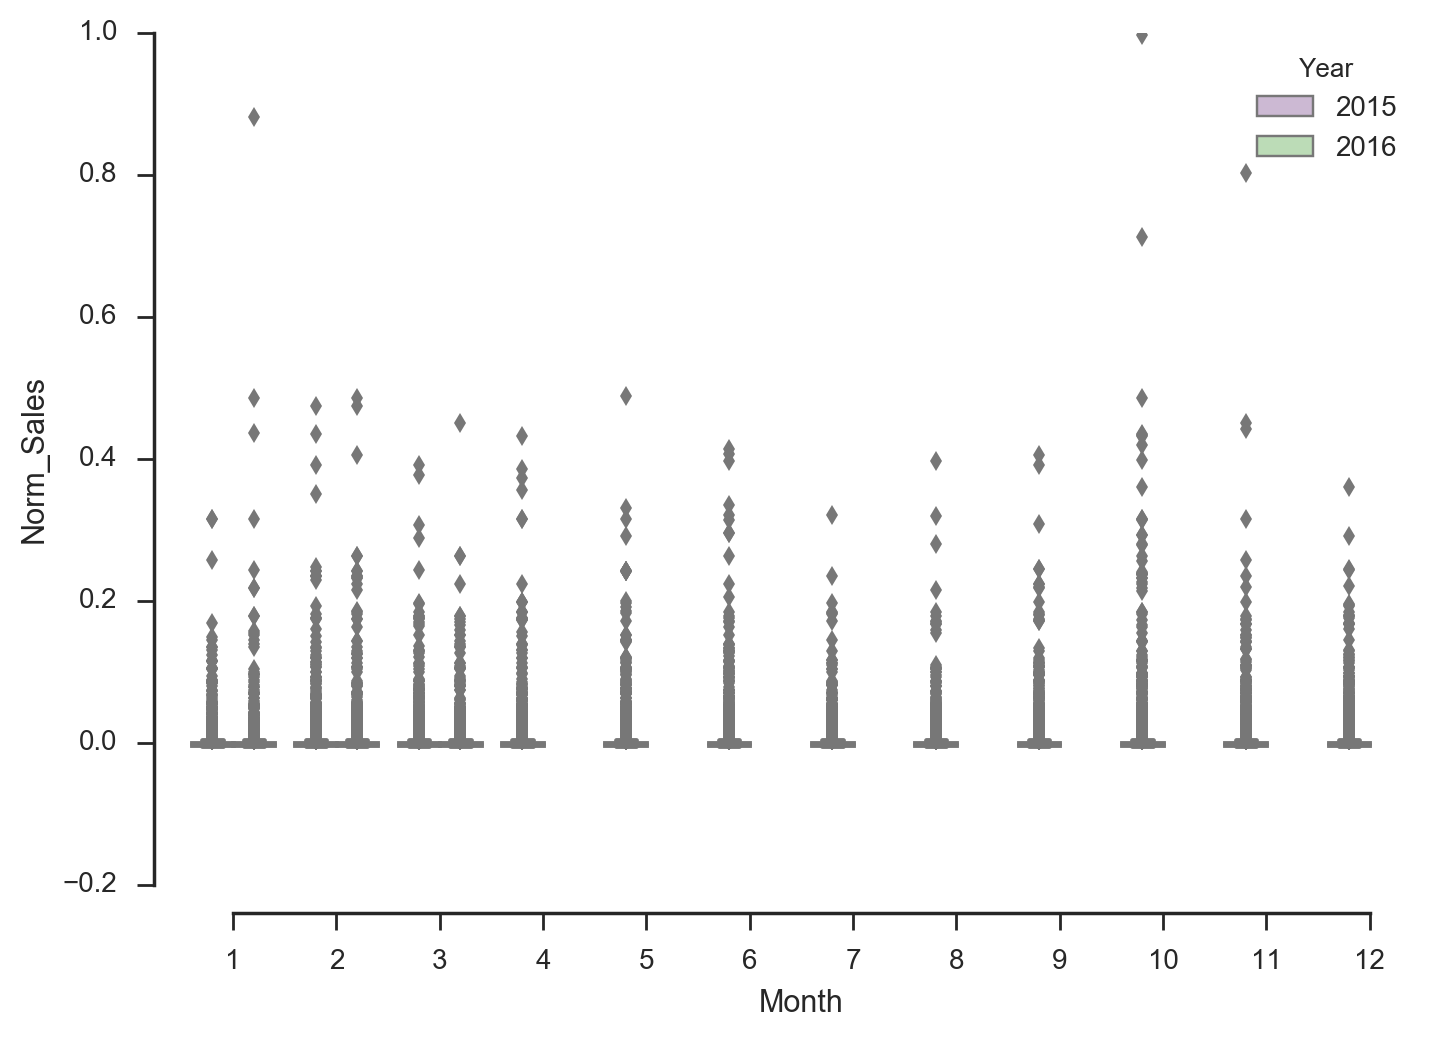

In [479]:

sns.set(style="ticks")


# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="Month", y="Norm_Sales", hue="Year", data=iowa_sales, palette="PRGn")
sns.despine(offset=10, trim=True)